In [252]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler

*Delete the UDI and Product ID as it has no benifit information*

In [254]:
df = pd.read_csv("sensors_data.csv")
df.drop(columns = ['UDI','Product ID'], inplace = True)
df

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


*EDA*

In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  object 
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Machine failure          10000 non-null  int64  
 7   TWF                      10000 non-null  int64  
 8   HDF                      10000 non-null  int64  
 9   PWF                      10000 non-null  int64  
 10  OSF                      10000 non-null  int64  
 11  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 937.6+ KB


In [257]:
df.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


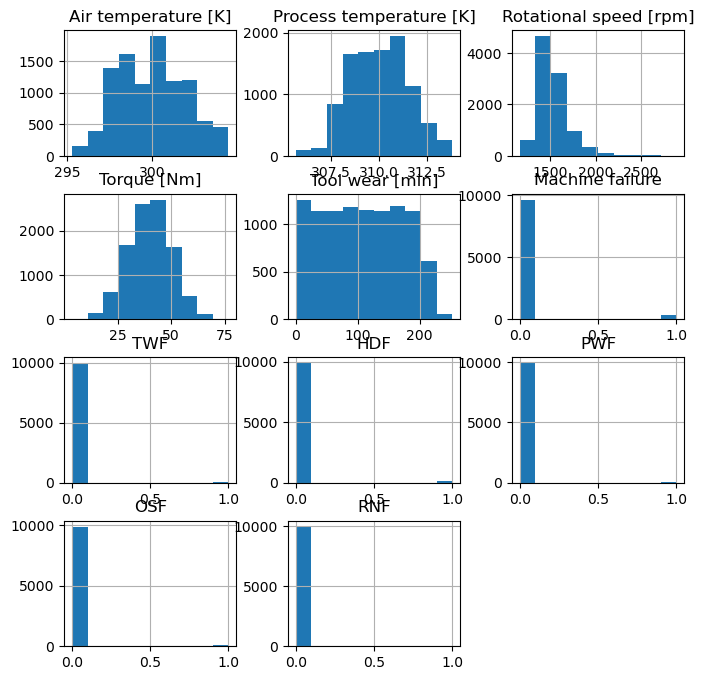

In [258]:
df.hist(figsize=(8, 8))
plt.show()

In [259]:
for column in df.columns:
    print(f"{column}: {df[column].unique()[:10]}") 

Type: ['M' 'L' 'H']
Air temperature [K]: [298.1 298.2 298.3 298.5 298.4 298.6 298.7 298.8 298.9 299. ]
Process temperature [K]: [308.6 308.7 308.5 309.  308.9 309.1 309.2 309.3 309.4 309.5]
Rotational speed [rpm]: [1551 1408 1498 1433 1425 1558 1527 1667 1741 1782]
Torque [Nm]: [42.8 46.3 49.4 39.5 40.  41.9 42.4 40.2 28.6 28. ]
Tool wear [min]: [ 0  3  5  7  9 11 14 16 18 21]
Machine failure: [0 1]
TWF: [0 1]
HDF: [0 1]
PWF: [0 1]
OSF: [0 1]
RNF: [0 1]


*Check for null data*

In [261]:
print(df.isnull().sum())

Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64


In [262]:
df.duplicated().sum()

0

In [263]:
df['Machine failure'].value_counts(normalize=True)

Machine failure
0    0.9661
1    0.0339
Name: proportion, dtype: float64

*Visualize relation between features and failure*

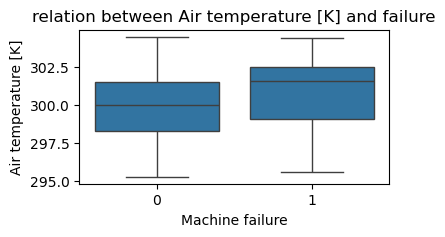

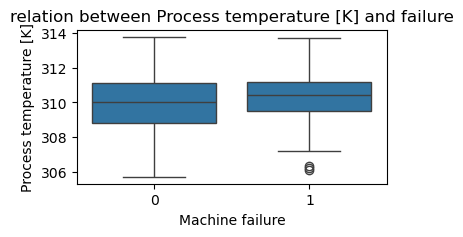

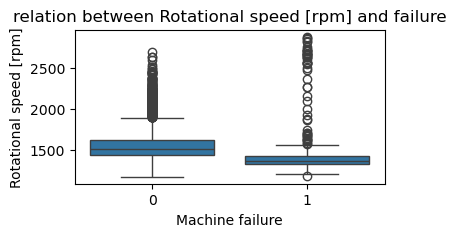

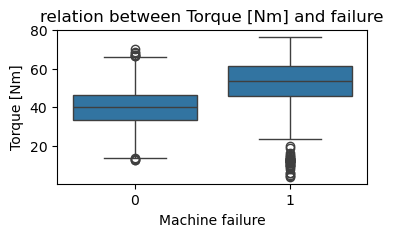

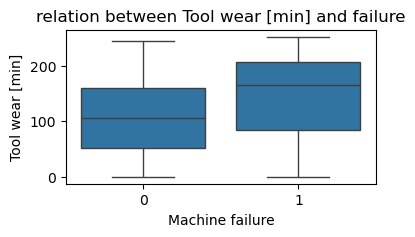

In [265]:
numerical_features = ['Air temperature [K]', 'Process temperature [K]', 
                     'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

for feature in numerical_features:
    plt.figure(figsize=(4,2))
    sns.boxplot(x='Machine failure', y=feature, data=df)
    plt.title(f'relation between {feature} and failure')
    plt.show()

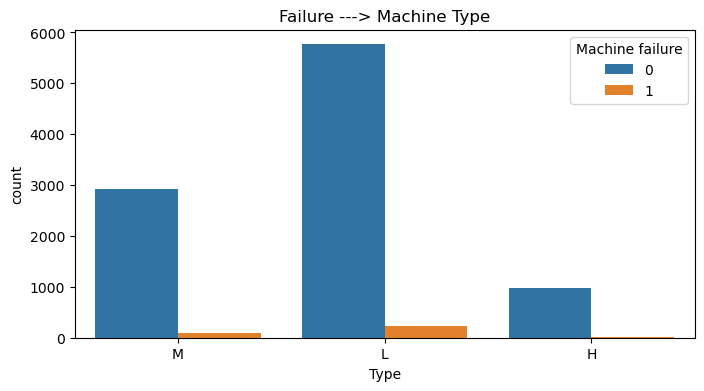

In [266]:
plt.figure(figsize=(8, 4))
sns.countplot(x='Type', hue='Machine failure', data=df)
plt.title('Failure ---> Machine Type')
plt.show()

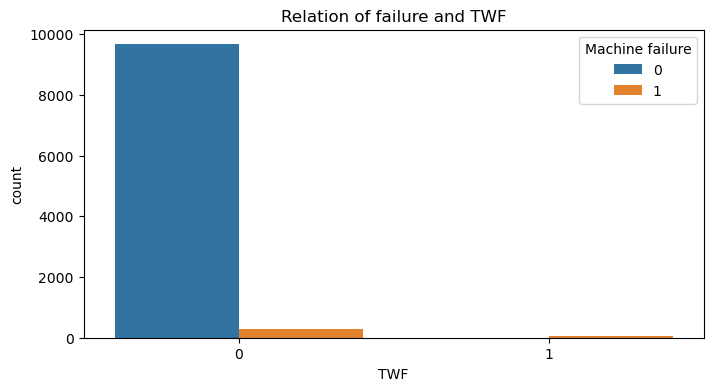

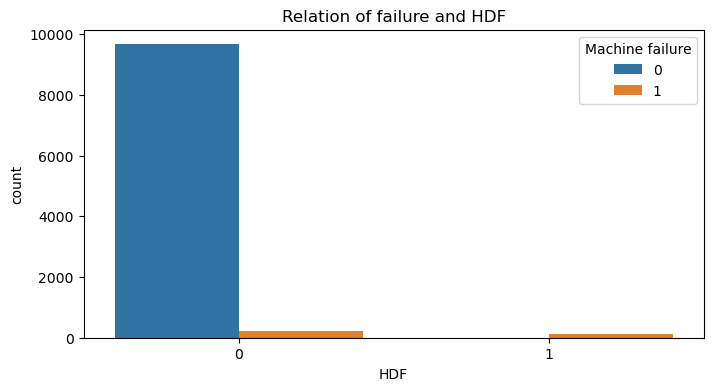

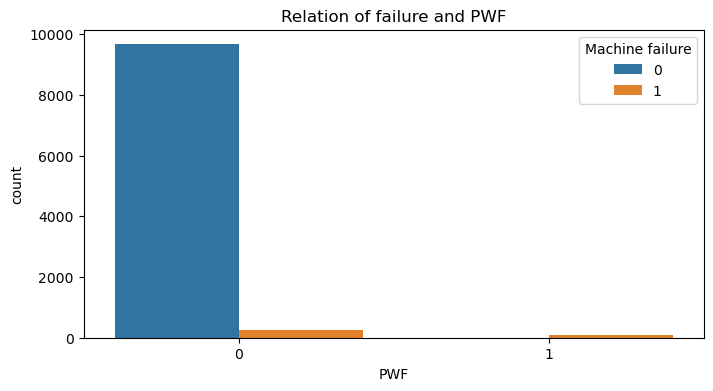

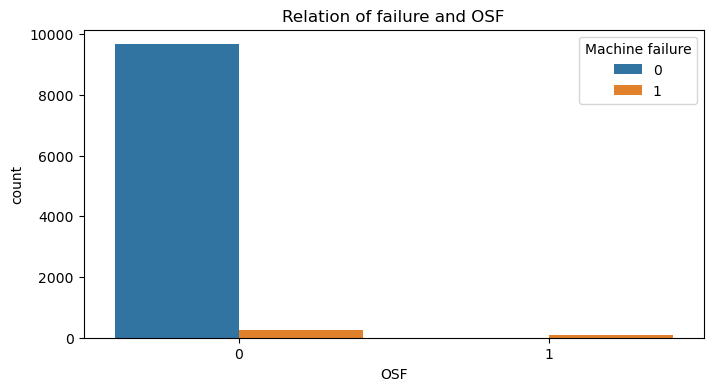

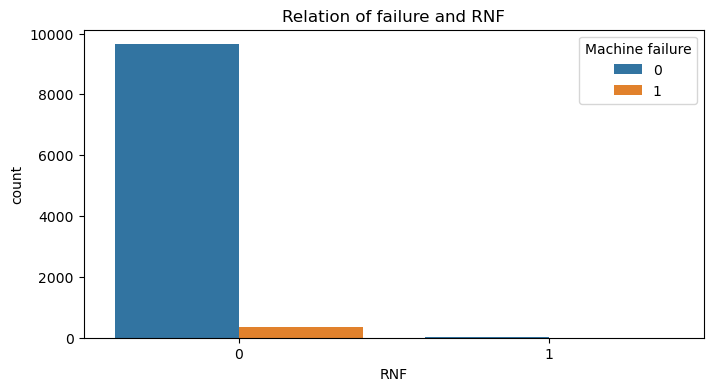

In [267]:
failure_subtypes = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']

for subtype in failure_subtypes:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=subtype, hue='Machine failure', data=df)
    plt.title(f'Relation of failure and {subtype}')
    plt.show()

*Generate new feature like any failure type and total failure type*

In [269]:
df['any_failure_type'] = df[['TWF', 'HDF', 'PWF', 'OSF', 'RNF']].max(axis=1)
df['total_failure_types'] = df[['TWF', 'HDF', 'PWF', 'OSF', 'RNF']].sum(axis=1)

In [270]:
df

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,any_failure_type,total_failure_types
0,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,0,0
1,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,0,0
2,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,0,0
3,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,0,0
4,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0,0,0
9996,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0,0,0
9997,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0,0,0
9998,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0,0,0


*Drop tyes of failure as its not useful but, may make the model biased towards the negative (0) ----> will at most times predict that the equipments has no error*

In [272]:
df = df.drop(['TWF', 'HDF', 'PWF', 'OSF', 'RNF'], axis=1)

In [273]:
df

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,any_failure_type,total_failure_types
0,M,298.1,308.6,1551,42.8,0,0,0,0
1,L,298.2,308.7,1408,46.3,3,0,0,0
2,L,298.1,308.5,1498,49.4,5,0,0,0
3,L,298.2,308.6,1433,39.5,7,0,0,0
4,L,298.2,308.7,1408,40.0,9,0,0,0
...,...,...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0,0,0
9996,H,298.9,308.4,1632,31.8,17,0,0,0
9997,M,299.0,308.6,1645,33.4,22,0,0,0
9998,H,299.0,308.7,1408,48.5,25,0,0,0


*Create two new features*

In [275]:
# Temperature difference and normalized ratio
df['temp_diff'] = df['Process temperature [K]'] - df['Air temperature [K]']
df['temp_ratio'] = df['Process temperature [K]'] / df['Air temperature [K]']

In [276]:
df

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,any_failure_type,total_failure_types,temp_diff,temp_ratio
0,M,298.1,308.6,1551,42.8,0,0,0,0,10.5,1.035223
1,L,298.2,308.7,1408,46.3,3,0,0,0,10.5,1.035211
2,L,298.1,308.5,1498,49.4,5,0,0,0,10.4,1.034888
3,L,298.2,308.6,1433,39.5,7,0,0,0,10.4,1.034876
4,L,298.2,308.7,1408,40.0,9,0,0,0,10.5,1.035211
...,...,...,...,...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0,0,0,9.6,1.032129
9996,H,298.9,308.4,1632,31.8,17,0,0,0,9.5,1.031783
9997,M,299.0,308.6,1645,33.4,22,0,0,0,9.6,1.032107
9998,H,299.0,308.7,1408,48.5,25,0,0,0,9.7,1.032441


*Rename columns to be more easier to be read*

In [278]:
df = df.rename(mapper={'Air temperature [K]': 'Air temperature',
                       'Process temperature [K]': 'Process temperature',
                       'Rotational speed [rpm]': 'Rotational speed',
                       'Torque [Nm]': 'Torque',
                       'Tool wear [min]': 'Tool wear'}, axis=1)
df

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,any_failure_type,total_failure_types,temp_diff,temp_ratio
0,M,298.1,308.6,1551,42.8,0,0,0,0,10.5,1.035223
1,L,298.2,308.7,1408,46.3,3,0,0,0,10.5,1.035211
2,L,298.1,308.5,1498,49.4,5,0,0,0,10.4,1.034888
3,L,298.2,308.6,1433,39.5,7,0,0,0,10.4,1.034876
4,L,298.2,308.7,1408,40.0,9,0,0,0,10.5,1.035211
...,...,...,...,...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0,0,0,9.6,1.032129
9996,H,298.9,308.4,1632,31.8,17,0,0,0,9.5,1.031783
9997,M,299.0,308.6,1645,33.4,22,0,0,0,9.6,1.032107
9998,H,299.0,308.7,1408,48.5,25,0,0,0,9.7,1.032441


In [279]:
df[['any_failure_type', 'total_failure_types']].sum()

any_failure_type       348
total_failure_types    373
dtype: int64

*Visualize the failure and the non failure -----> This makes imbalanced data must be edited before applying model*

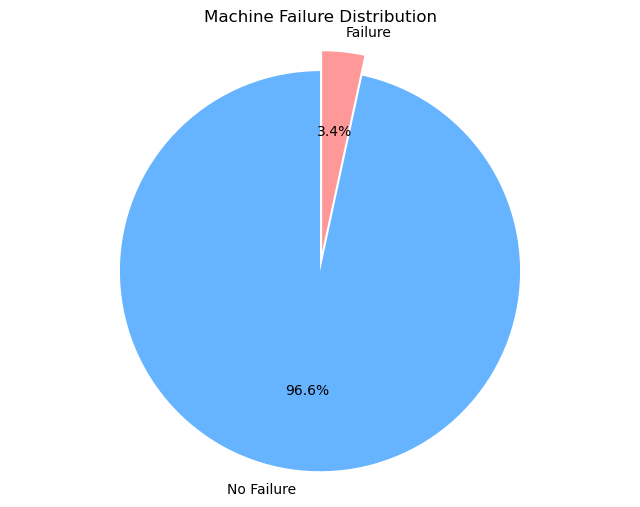

In [281]:

# Count failure occurrences
failure_counts = df['Machine failure'].value_counts()

# Create pie chart
plt.figure(figsize=(8, 6))
plt.pie(failure_counts, 
        labels=['No Failure', 'Failure'],
        autopct='%1.1f%%',
        colors=['#66b3ff','#ff9999'],
        startangle=90,
        explode=(0.1, 0))  # Explode the failure slice

plt.title('Machine Failure Distribution')
plt.axis('equal')  # Equal aspect ratio ensures circular pie
plt.show()

In [282]:
df['Machine failure'].value_counts(normalize=True)

Machine failure
0    0.9661
1    0.0339
Name: proportion, dtype: float64

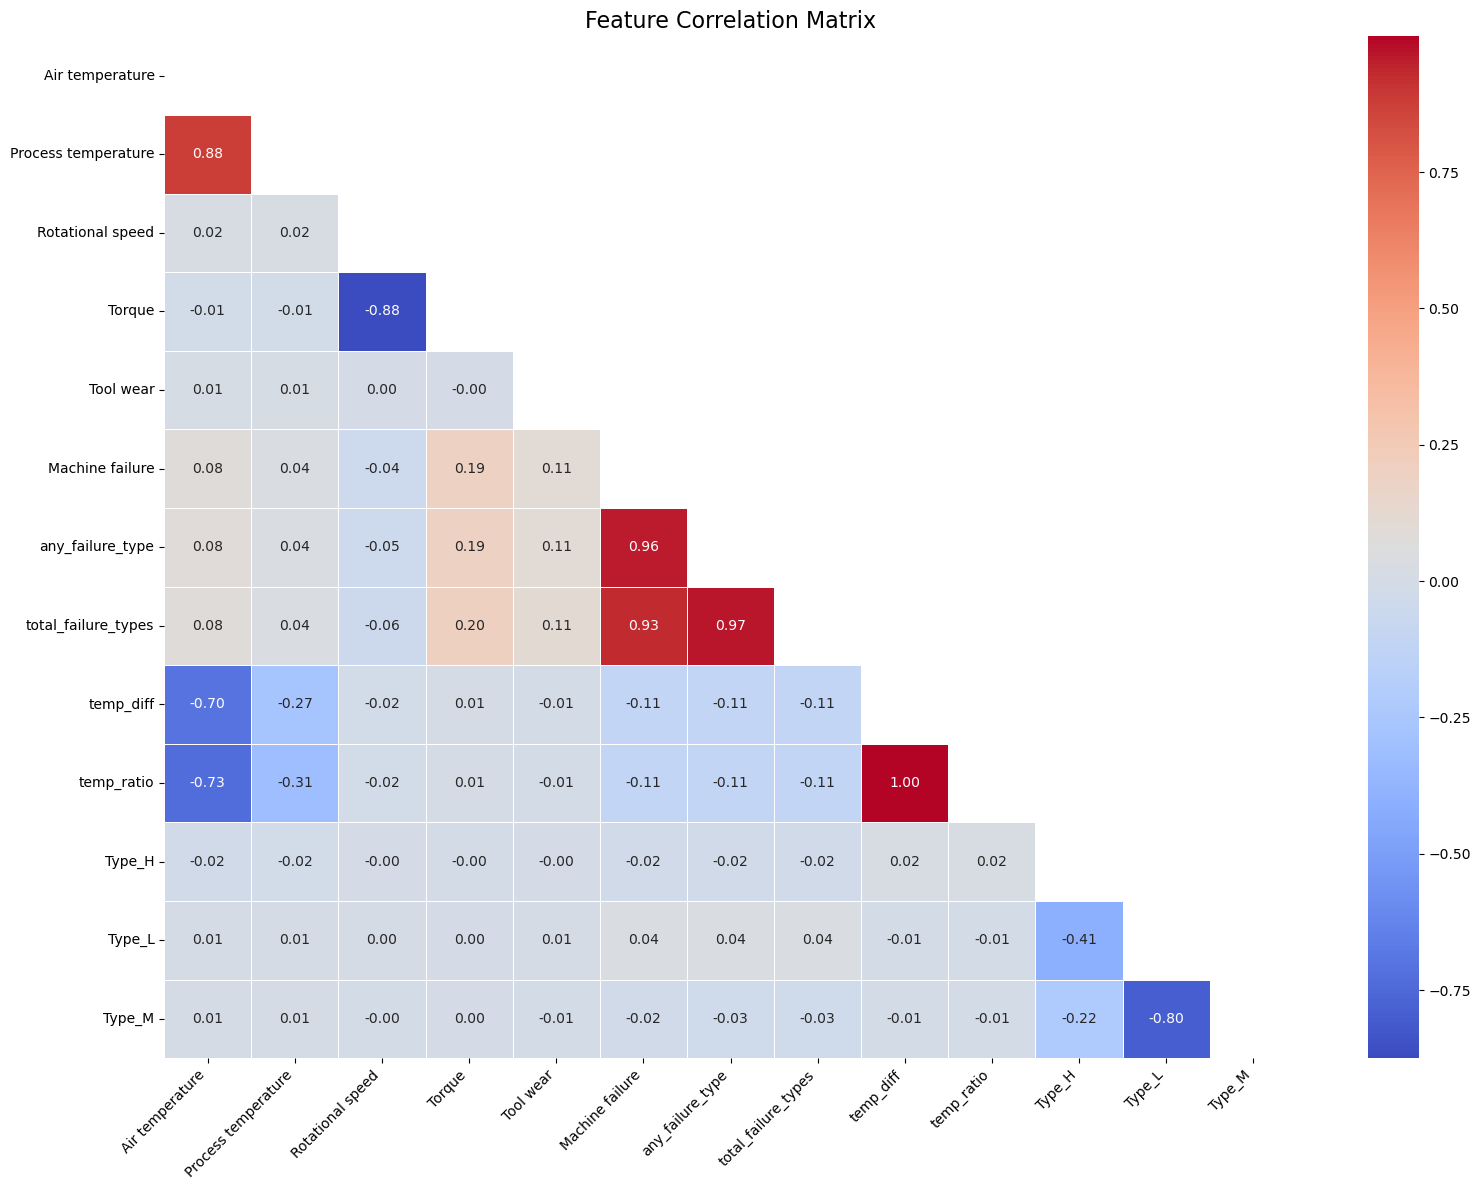

In [283]:
# Encode categorical 'Type' first
df_encoded = pd.get_dummies(df, columns=['Type'], prefix=['Type'])

# Calculate correlations
corr_matrix = df_encoded.corr()

# Create heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, 
            annot=True, 
            cmap='coolwarm', 
            fmt=".2f",
            mask=np.triu(np.ones_like(corr_matrix, dtype=bool)),
            linewidths=0.5)
plt.title("Feature Correlation Matrix", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [284]:
df

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,any_failure_type,total_failure_types,temp_diff,temp_ratio
0,M,298.1,308.6,1551,42.8,0,0,0,0,10.5,1.035223
1,L,298.2,308.7,1408,46.3,3,0,0,0,10.5,1.035211
2,L,298.1,308.5,1498,49.4,5,0,0,0,10.4,1.034888
3,L,298.2,308.6,1433,39.5,7,0,0,0,10.4,1.034876
4,L,298.2,308.7,1408,40.0,9,0,0,0,10.5,1.035211
...,...,...,...,...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0,0,0,9.6,1.032129
9996,H,298.9,308.4,1632,31.8,17,0,0,0,9.5,1.031783
9997,M,299.0,308.6,1645,33.4,22,0,0,0,9.6,1.032107
9998,H,299.0,308.7,1408,48.5,25,0,0,0,9.7,1.032441


In [285]:
for column in ['Air temperature', 'Process temperature', 'Rotational speed', 'Torque', 'Tool wear','temp_diff','temp_ratio']:
    skewness = round(df[column].skew(),3)
    print(f'Skewness of {column}: {skewness}')

Skewness of Air temperature: 0.114
Skewness of Process temperature: 0.015
Skewness of Rotational speed: 1.993
Skewness of Torque: -0.01
Skewness of Tool wear: 0.027
Skewness of temp_diff: -0.072
Skewness of temp_ratio: -0.083


**Use log to decrease the rational speed skewness**

In [287]:
df['Rotational_speed_log'] = np.log1p(df['Rotational speed'])

new_skewness = round(df['Rotational_speed_log'].skew(), 3)
print(f'الانحراف بعد التحويل: {new_skewness}')

الانحراف بعد التحويل: 1.31


In [288]:
for column in ['Air temperature', 'Process temperature', 'Rotational_speed_log', 'Torque', 'Tool wear','temp_diff','temp_ratio']:
    skewness = round(df[column].skew(),3)
    print(f'Skewness of {column}: {skewness}')

Skewness of Air temperature: 0.114
Skewness of Process temperature: 0.015
Skewness of Rotational_speed_log: 1.31
Skewness of Torque: -0.01
Skewness of Tool wear: 0.027
Skewness of temp_diff: -0.072
Skewness of temp_ratio: -0.083


In [289]:
df

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,any_failure_type,total_failure_types,temp_diff,temp_ratio,Rotational_speed_log
0,M,298.1,308.6,1551,42.8,0,0,0,0,10.5,1.035223,7.347300
1,L,298.2,308.7,1408,46.3,3,0,0,0,10.5,1.035211,7.250636
2,L,298.1,308.5,1498,49.4,5,0,0,0,10.4,1.034888,7.312553
3,L,298.2,308.6,1433,39.5,7,0,0,0,10.4,1.034876,7.268223
4,L,298.2,308.7,1408,40.0,9,0,0,0,10.5,1.035211,7.250636
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0,0,0,9.6,1.032129,7.380879
9996,H,298.9,308.4,1632,31.8,17,0,0,0,9.5,1.031783,7.398174
9997,M,299.0,308.6,1645,33.4,22,0,0,0,9.6,1.032107,7.406103
9998,H,299.0,308.7,1408,48.5,25,0,0,0,9.7,1.032441,7.250636


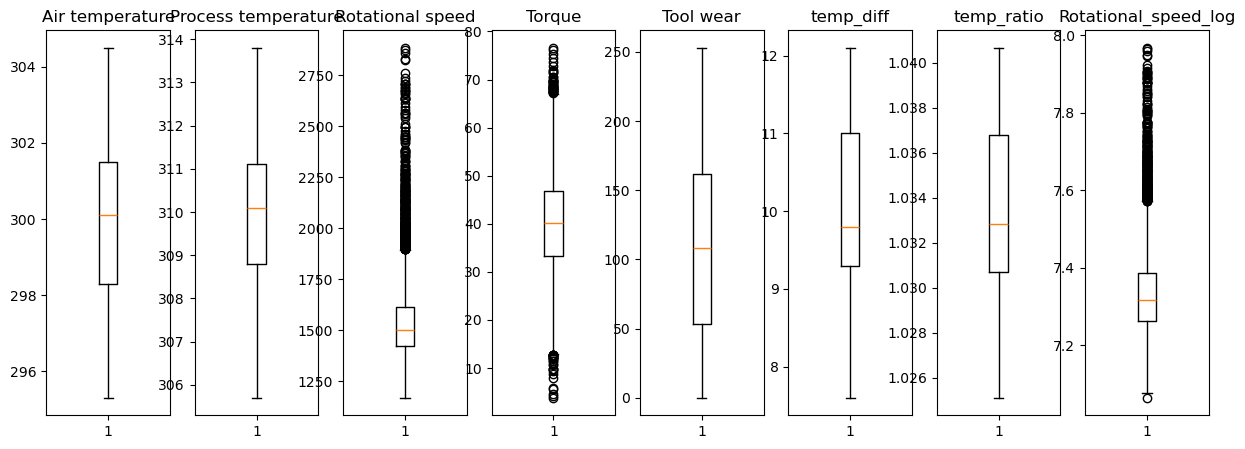

In [290]:
fig, axs = plt.subplots(ncols=8, figsize=(15, 5))

# list of column names for the boxplots
columns = ['Air temperature', 'Process temperature', 'Rotational speed', 'Torque', 'Tool wear','temp_diff',	'temp_ratio','Rotational_speed_log']

# loop through the columns and plot the corresponding boxplot
for i, col in enumerate(columns):
    axs[i].boxplot(df[col])
    axs[i].set_title(col)

# display the plot
plt.show()

In [291]:
skew_before = round(df['Rotational speed'].skew(), 3)

skew_after = round(df['Rotational_speed_log'].skew(), 3)

print(f'الانحراف قبل التحويل: {skew_before}')
print(f'الانحراف بعد التحويل: {skew_after}')

الانحراف قبل التحويل: 1.993
الانحراف بعد التحويل: 1.31


**Capture and Fix outliers**

In [293]:
def cap_outliers_iqr_all(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df[column] = df[column].clip(lower, upper)
    return df

columns_to_cap = ['Rotational speed', 'Torque', 'Tool wear', 'Rotational_speed_log']
df = cap_outliers_iqr_all(df, columns_to_cap)


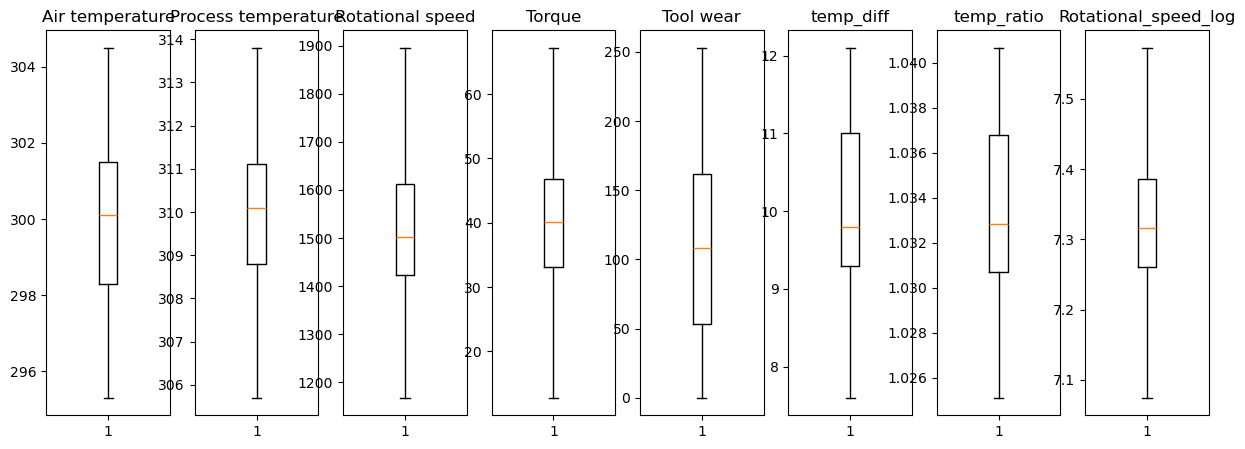

In [294]:
fig, axs = plt.subplots(ncols=8, figsize=(15, 5))

# list of column names for the boxplots
columns = ['Air temperature', 'Process temperature', 'Rotational speed', 'Torque', 'Tool wear','temp_diff',	'temp_ratio','Rotational_speed_log']

# loop through the columns and plot the corresponding boxplot
for i, col in enumerate(columns):
    axs[i].boxplot(df[col])
    axs[i].set_title(col)

# display the plot
plt.show()

In [295]:
skew_before = round(df['Rotational speed'].skew(), 3)

skew_after = round(df['Rotational_speed_log'].skew(), 3)

print(f'الانحراف قبل التحويل: {skew_before}')
print(f'الانحراف بعد التحويل: {skew_after}')

الانحراف قبل التحويل: 0.746
الانحراف بعد التحويل: 0.624


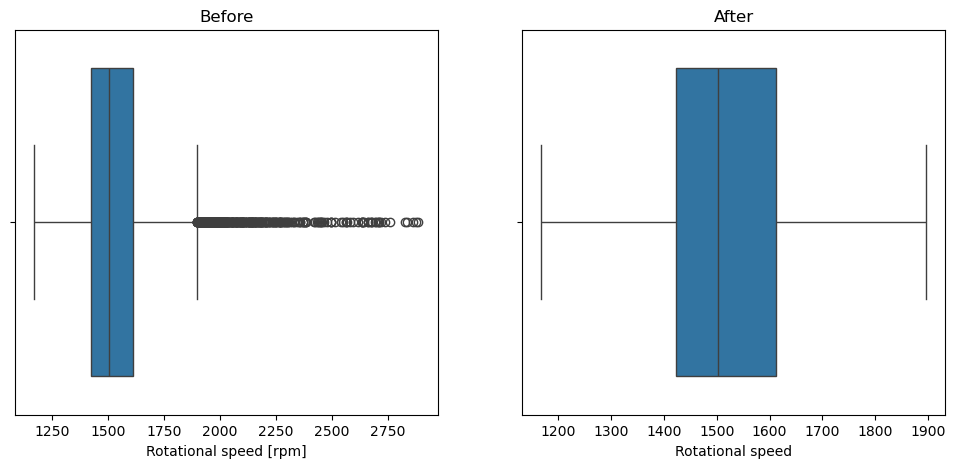

In [296]:
df_original = pd.read_csv("sensors_data.csv")
fig, axs = plt.subplots(ncols=2, figsize=(12, 5))

# Before fix skweness
sns.boxplot(data=df_original, x="Rotational speed [rpm]", ax=axs[0])
axs[0].set_title("Before")

# After fix skweness
sns.boxplot(data=df, x="Rotational speed", ax=axs[1])
axs[1].set_title("After")

plt.show()

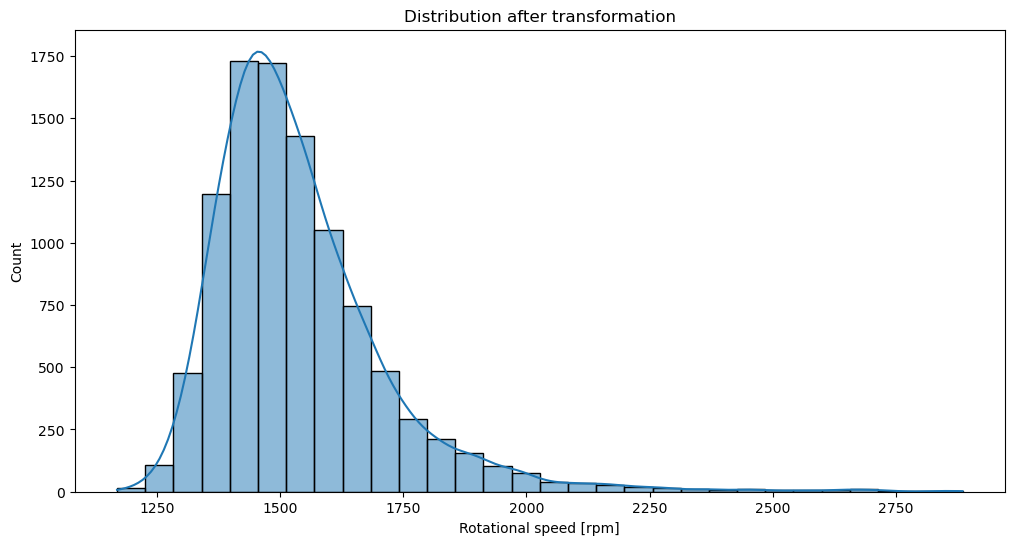

In [297]:
plt.figure(figsize=(12, 6))
sns.histplot(df_original['Rotational speed [rpm]'], bins=30, kde=True)
plt.title('Distribution after transformation')
plt.show()

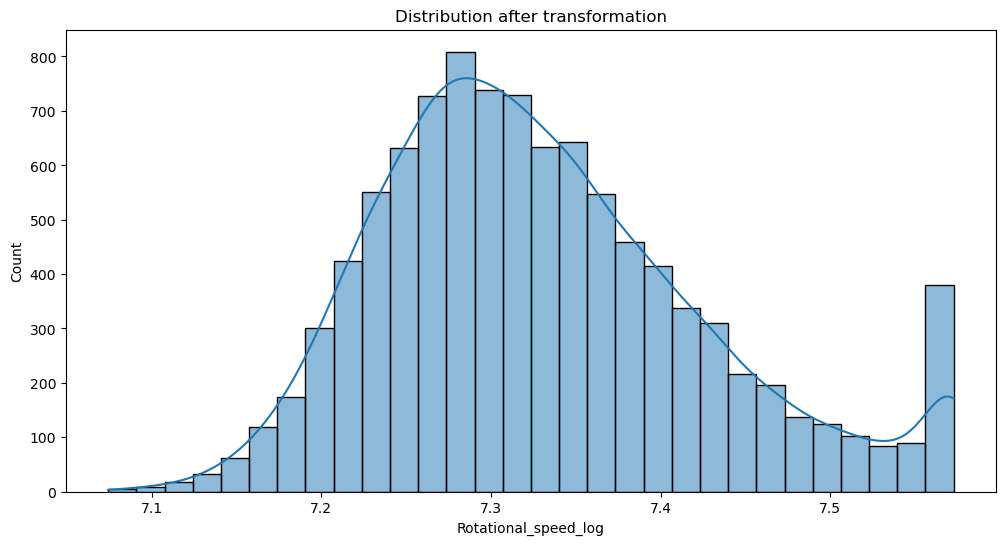

In [298]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Rotational_speed_log'], bins=30, kde=True)
plt.title('Distribution after transformation')
plt.show()

In [299]:
df

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,any_failure_type,total_failure_types,temp_diff,temp_ratio,Rotational_speed_log
0,M,298.1,308.6,1551.0,42.8,0,0,0,0,10.5,1.035223,7.347300
1,L,298.2,308.7,1408.0,46.3,3,0,0,0,10.5,1.035211,7.250636
2,L,298.1,308.5,1498.0,49.4,5,0,0,0,10.4,1.034888,7.312553
3,L,298.2,308.6,1433.0,39.5,7,0,0,0,10.4,1.034876,7.268223
4,L,298.2,308.7,1408.0,40.0,9,0,0,0,10.5,1.035211,7.250636
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604.0,29.5,14,0,0,0,9.6,1.032129,7.380879
9996,H,298.9,308.4,1632.0,31.8,17,0,0,0,9.5,1.031783,7.398174
9997,M,299.0,308.6,1645.0,33.4,22,0,0,0,9.6,1.032107,7.406103
9998,H,299.0,308.7,1408.0,48.5,25,0,0,0,9.7,1.032441,7.250636


*Visualize the data*

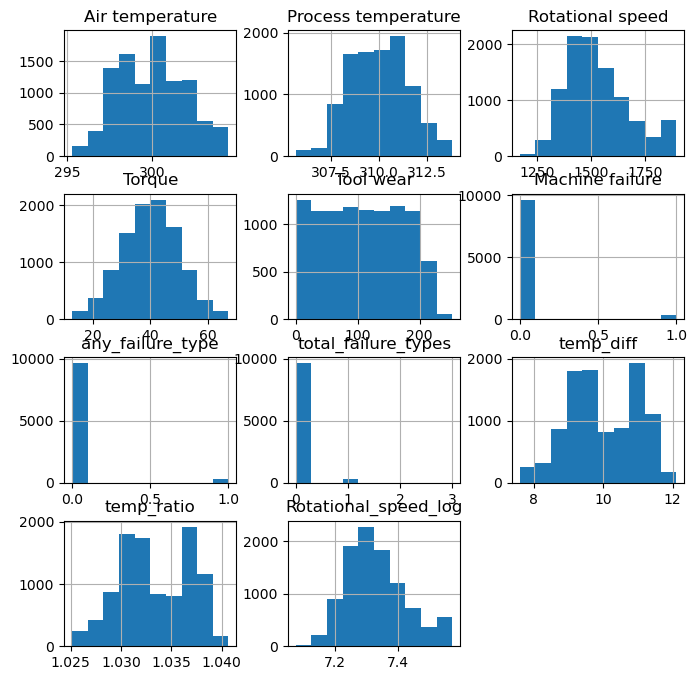

In [301]:
df.hist(figsize=(8, 8))
plt.show()

*Convert type to numbers*

In [303]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder(categories=[['L', 'M', 'H']])

df['Type'] = ord_enc.fit_transform(df[['Type']])

print(df[['Type']].head())

   Type
0   1.0
1   0.0
2   0.0
3   0.0
4   0.0


In [304]:
df

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,any_failure_type,total_failure_types,temp_diff,temp_ratio,Rotational_speed_log
0,1.0,298.1,308.6,1551.0,42.8,0,0,0,0,10.5,1.035223,7.347300
1,0.0,298.2,308.7,1408.0,46.3,3,0,0,0,10.5,1.035211,7.250636
2,0.0,298.1,308.5,1498.0,49.4,5,0,0,0,10.4,1.034888,7.312553
3,0.0,298.2,308.6,1433.0,39.5,7,0,0,0,10.4,1.034876,7.268223
4,0.0,298.2,308.7,1408.0,40.0,9,0,0,0,10.5,1.035211,7.250636
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.0,298.8,308.4,1604.0,29.5,14,0,0,0,9.6,1.032129,7.380879
9996,2.0,298.9,308.4,1632.0,31.8,17,0,0,0,9.5,1.031783,7.398174
9997,1.0,299.0,308.6,1645.0,33.4,22,0,0,0,9.6,1.032107,7.406103
9998,2.0,299.0,308.7,1408.0,48.5,25,0,0,0,9.7,1.032441,7.250636


In [305]:
# sns.histplot(df['Rotational_speed_log'], bins=30, kde=True)
# plt.title('Distribution after transformation')
# plt.show()

In [306]:
df.dtypes

Type                    float64
Air temperature         float64
Process temperature     float64
Rotational speed        float64
Torque                  float64
Tool wear                 int64
Machine failure           int64
any_failure_type          int64
total_failure_types       int64
temp_diff               float64
temp_ratio              float64
Rotational_speed_log    float64
dtype: object

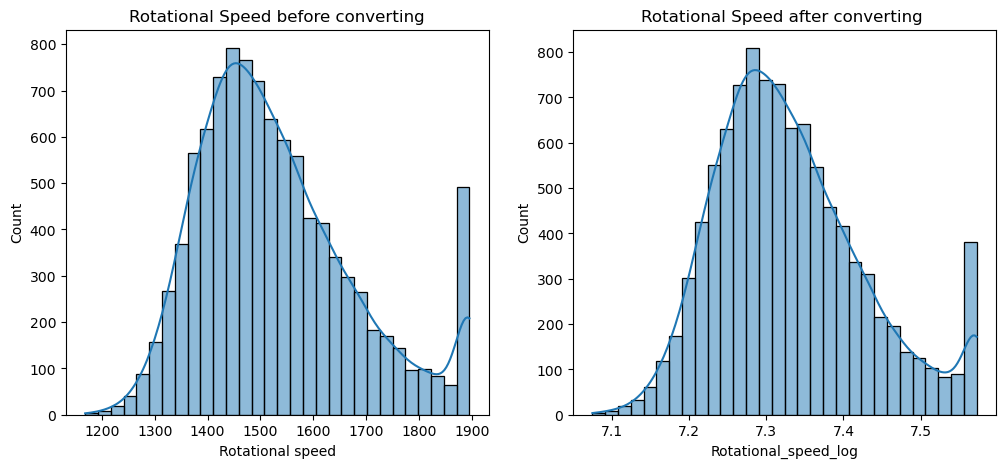

In [307]:
fig, axs = plt.subplots(ncols=2, figsize=(12, 5))

# توزيع قبل التحويل
sns.histplot(df['Rotational speed'], bins=30, kde=True, ax=axs[0])
axs[0].set_title('Rotational Speed before converting')

# توزيع بعد التحويل
sns.histplot(df['Rotational_speed_log'], bins=30, kde=True, ax=axs[1])
axs[1].set_title('Rotational Speed after converting ')

plt.show()

In [308]:
df[['Rotational speed', 'Rotational_speed_log', 'Machine failure']].corr()

,Rotational speed,Rotational_speed_log,Machine failure
Rotational speed,1.000000,0.998822,-0.130467
Rotational_speed_log,0.998822,1.000000,-0.137622
Machine failure,-0.130467,-0.137622,1.000000


*Drop rational speed column as we fixed it using log and will use log column*

In [310]:
df.drop(columns=['Rotational speed'], inplace=True)

In [311]:
df

,Type,Air temperature,Process temperature,Torque,Tool wear,Machine failure,any_failure_type,total_failure_types,temp_diff,temp_ratio,Rotational_speed_log
0,1.0,298.1,308.6,42.8,0,0,0,0,10.5,1.035223,7.347300
1,0.0,298.2,308.7,46.3,3,0,0,0,10.5,1.035211,7.250636
2,0.0,298.1,308.5,49.4,5,0,0,0,10.4,1.034888,7.312553
3,0.0,298.2,308.6,39.5,7,0,0,0,10.4,1.034876,7.268223
4,0.0,298.2,308.7,40.0,9,0,0,0,10.5,1.035211,7.250636
...,...,...,...,...,...,...,...,...,...,...,...
9995,1.0,298.8,308.4,29.5,14,0,0,0,9.6,1.032129,7.380879
9996,2.0,298.9,308.4,31.8,17,0,0,0,9.5,1.031783,7.398174
9997,1.0,299.0,308.6,33.4,22,0,0,0,9.6,1.032107,7.406103
9998,2.0,299.0,308.7,48.5,25,0,0,0,9.7,1.032441,7.250636


In [312]:
df

,Type,Air temperature,Process temperature,Torque,Tool wear,Machine failure,any_failure_type,total_failure_types,temp_diff,temp_ratio,Rotational_speed_log
0,1.0,298.1,308.6,42.8,0,0,0,0,10.5,1.035223,7.347300
1,0.0,298.2,308.7,46.3,3,0,0,0,10.5,1.035211,7.250636
2,0.0,298.1,308.5,49.4,5,0,0,0,10.4,1.034888,7.312553
3,0.0,298.2,308.6,39.5,7,0,0,0,10.4,1.034876,7.268223
4,0.0,298.2,308.7,40.0,9,0,0,0,10.5,1.035211,7.250636
...,...,...,...,...,...,...,...,...,...,...,...
9995,1.0,298.8,308.4,29.5,14,0,0,0,9.6,1.032129,7.380879
9996,2.0,298.9,308.4,31.8,17,0,0,0,9.5,1.031783,7.398174
9997,1.0,299.0,308.6,33.4,22,0,0,0,9.6,1.032107,7.406103
9998,2.0,299.0,308.7,48.5,25,0,0,0,9.7,1.032441,7.250636


In [313]:
df.drop(columns=['any_failure_type', 'total_failure_types'], inplace=True)

In [314]:
df

,Type,Air temperature,Process temperature,Torque,Tool wear,Machine failure,temp_diff,temp_ratio,Rotational_speed_log
0,1.0,298.1,308.6,42.8,0,0,10.5,1.035223,7.347300
1,0.0,298.2,308.7,46.3,3,0,10.5,1.035211,7.250636
2,0.0,298.1,308.5,49.4,5,0,10.4,1.034888,7.312553
3,0.0,298.2,308.6,39.5,7,0,10.4,1.034876,7.268223
4,0.0,298.2,308.7,40.0,9,0,10.5,1.035211,7.250636
...,...,...,...,...,...,...,...,...,...
9995,1.0,298.8,308.4,29.5,14,0,9.6,1.032129,7.380879
9996,2.0,298.9,308.4,31.8,17,0,9.5,1.031783,7.398174
9997,1.0,299.0,308.6,33.4,22,0,9.6,1.032107,7.406103
9998,2.0,299.0,308.7,48.5,25,0,9.7,1.032441,7.250636


In [315]:
df['wear_torque_ratio'] = df['Tool wear'] / df['Torque']

In [316]:
df

,Type,Air temperature,Process temperature,Torque,Tool wear,Machine failure,temp_diff,temp_ratio,Rotational_speed_log,wear_torque_ratio
0,1.0,298.1,308.6,42.8,0,0,10.5,1.035223,7.347300,0.000000
1,0.0,298.2,308.7,46.3,3,0,10.5,1.035211,7.250636,0.064795
2,0.0,298.1,308.5,49.4,5,0,10.4,1.034888,7.312553,0.101215
3,0.0,298.2,308.6,39.5,7,0,10.4,1.034876,7.268223,0.177215
4,0.0,298.2,308.7,40.0,9,0,10.5,1.035211,7.250636,0.225000
...,...,...,...,...,...,...,...,...,...,...
9995,1.0,298.8,308.4,29.5,14,0,9.6,1.032129,7.380879,0.474576
9996,2.0,298.9,308.4,31.8,17,0,9.5,1.031783,7.398174,0.534591
9997,1.0,299.0,308.6,33.4,22,0,9.6,1.032107,7.406103,0.658683
9998,2.0,299.0,308.7,48.5,25,0,9.7,1.032441,7.250636,0.515464


In [317]:
print(df.corr()['Machine failure'].sort_values(ascending=False))

Machine failure         1.000000
Torque                  0.190806
Tool wear               0.105448
Air temperature         0.082556
wear_torque_ratio       0.048546
Process temperature     0.035946
Type                   -0.036715
temp_ratio             -0.111347
temp_diff              -0.111676
Rotational_speed_log   -0.137622
Name: Machine failure, dtype: float64


In [318]:
df['temp_ratio'] = df['Process temperature'] / df['Air temperature']

In [319]:
df

,Type,Air temperature,Process temperature,Torque,Tool wear,Machine failure,temp_diff,temp_ratio,Rotational_speed_log,wear_torque_ratio
0,1.0,298.1,308.6,42.8,0,0,10.5,1.035223,7.347300,0.000000
1,0.0,298.2,308.7,46.3,3,0,10.5,1.035211,7.250636,0.064795
2,0.0,298.1,308.5,49.4,5,0,10.4,1.034888,7.312553,0.101215
3,0.0,298.2,308.6,39.5,7,0,10.4,1.034876,7.268223,0.177215
4,0.0,298.2,308.7,40.0,9,0,10.5,1.035211,7.250636,0.225000
...,...,...,...,...,...,...,...,...,...,...
9995,1.0,298.8,308.4,29.5,14,0,9.6,1.032129,7.380879,0.474576
9996,2.0,298.9,308.4,31.8,17,0,9.5,1.031783,7.398174,0.534591
9997,1.0,299.0,308.6,33.4,22,0,9.6,1.032107,7.406103,0.658683
9998,2.0,299.0,308.7,48.5,25,0,9.7,1.032441,7.250636,0.515464


In [320]:
df['Torque_Delta'] = df['Torque'].diff()

In [321]:
df

,Type,Air temperature,Process temperature,Torque,Tool wear,Machine failure,temp_diff,temp_ratio,Rotational_speed_log,wear_torque_ratio,Torque_Delta
0,1.0,298.1,308.6,42.8,0,0,10.5,1.035223,7.347300,0.000000,NaN
1,0.0,298.2,308.7,46.3,3,0,10.5,1.035211,7.250636,0.064795,3.5
2,0.0,298.1,308.5,49.4,5,0,10.4,1.034888,7.312553,0.101215,3.1
3,0.0,298.2,308.6,39.5,7,0,10.4,1.034876,7.268223,0.177215,-9.9
4,0.0,298.2,308.7,40.0,9,0,10.5,1.035211,7.250636,0.225000,0.5
...,...,...,...,...,...,...,...,...,...,...,...
9995,1.0,298.8,308.4,29.5,14,0,9.6,1.032129,7.380879,0.474576,1.6
9996,2.0,298.9,308.4,31.8,17,0,9.5,1.031783,7.398174,0.534591,2.3
9997,1.0,299.0,308.6,33.4,22,0,9.6,1.032107,7.406103,0.658683,1.6
9998,2.0,299.0,308.7,48.5,25,0,9.7,1.032441,7.250636,0.515464,15.1


In [322]:
df.drop(columns=['wear_torque_ratio'], inplace=True)

In [323]:
df

,Type,Air temperature,Process temperature,Torque,Tool wear,Machine failure,temp_diff,temp_ratio,Rotational_speed_log,Torque_Delta
0,1.0,298.1,308.6,42.8,0,0,10.5,1.035223,7.347300,NaN
1,0.0,298.2,308.7,46.3,3,0,10.5,1.035211,7.250636,3.5
2,0.0,298.1,308.5,49.4,5,0,10.4,1.034888,7.312553,3.1
3,0.0,298.2,308.6,39.5,7,0,10.4,1.034876,7.268223,-9.9
4,0.0,298.2,308.7,40.0,9,0,10.5,1.035211,7.250636,0.5
...,...,...,...,...,...,...,...,...,...,...
9995,1.0,298.8,308.4,29.5,14,0,9.6,1.032129,7.380879,1.6
9996,2.0,298.9,308.4,31.8,17,0,9.5,1.031783,7.398174,2.3
9997,1.0,299.0,308.6,33.4,22,0,9.6,1.032107,7.406103,1.6
9998,2.0,299.0,308.7,48.5,25,0,9.7,1.032441,7.250636,15.1


In [324]:
print(df.corr()['Machine failure'].sort_values(ascending=False))

Machine failure         1.000000
Torque                  0.190806
Torque_Delta            0.131703
Tool wear               0.105448
Air temperature         0.082556
Process temperature     0.035946
Type                   -0.036715
temp_ratio             -0.111347
temp_diff              -0.111676
Rotational_speed_log   -0.137622
Name: Machine failure, dtype: float64


In [325]:
df.isnull().sum()

Type                    0
Air temperature         0
Process temperature     0
Torque                  0
Tool wear               0
Machine failure         0
temp_diff               0
temp_ratio              0
Rotational_speed_log    0
Torque_Delta            1
dtype: int64

In [326]:
df['Torque_Delta'] = df['Torque_Delta'].fillna(df['Torque_Delta'].mean())

In [327]:
df

,Type,Air temperature,Process temperature,Torque,Tool wear,Machine failure,temp_diff,temp_ratio,Rotational_speed_log,Torque_Delta
0,1.0,298.1,308.6,42.8,0,0,10.5,1.035223,7.347300,-0.00026
1,0.0,298.2,308.7,46.3,3,0,10.5,1.035211,7.250636,3.50000
2,0.0,298.1,308.5,49.4,5,0,10.4,1.034888,7.312553,3.10000
3,0.0,298.2,308.6,39.5,7,0,10.4,1.034876,7.268223,-9.90000
4,0.0,298.2,308.7,40.0,9,0,10.5,1.035211,7.250636,0.50000
...,...,...,...,...,...,...,...,...,...,...
9995,1.0,298.8,308.4,29.5,14,0,9.6,1.032129,7.380879,1.60000
9996,2.0,298.9,308.4,31.8,17,0,9.5,1.031783,7.398174,2.30000
9997,1.0,299.0,308.6,33.4,22,0,9.6,1.032107,7.406103,1.60000
9998,2.0,299.0,308.7,48.5,25,0,9.7,1.032441,7.250636,15.10000


In [328]:
df.isnull().sum()

Type                    0
Air temperature         0
Process temperature     0
Torque                  0
Tool wear               0
Machine failure         0
temp_diff               0
temp_ratio              0
Rotational_speed_log    0
Torque_Delta            0
dtype: int64

In [329]:
df

,Type,Air temperature,Process temperature,Torque,Tool wear,Machine failure,temp_diff,temp_ratio,Rotational_speed_log,Torque_Delta
0,1.0,298.1,308.6,42.8,0,0,10.5,1.035223,7.347300,-0.00026
1,0.0,298.2,308.7,46.3,3,0,10.5,1.035211,7.250636,3.50000
2,0.0,298.1,308.5,49.4,5,0,10.4,1.034888,7.312553,3.10000
3,0.0,298.2,308.6,39.5,7,0,10.4,1.034876,7.268223,-9.90000
4,0.0,298.2,308.7,40.0,9,0,10.5,1.035211,7.250636,0.50000
...,...,...,...,...,...,...,...,...,...,...
9995,1.0,298.8,308.4,29.5,14,0,9.6,1.032129,7.380879,1.60000
9996,2.0,298.9,308.4,31.8,17,0,9.5,1.031783,7.398174,2.30000
9997,1.0,299.0,308.6,33.4,22,0,9.6,1.032107,7.406103,1.60000
9998,2.0,299.0,308.7,48.5,25,0,9.7,1.032441,7.250636,15.10000


In [330]:
data_scaled = df.copy()

scaler = RobustScaler()
scaled_data = scaler.fit_transform(data_scaled[['Rotational_speed_log', 'Torque_Delta']])

scaled_data = pd.DataFrame(scaled_data, columns=['Rotational_speed_log', 'Torque_Delta'])

data_scaled.drop(['Rotational_speed_log', 'Torque_Delta'], axis=1, inplace=True)

data_scaled = pd.concat([data_scaled, scaled_data], axis=1)

data_scaled.head()

,Type,Air temperature,Process temperature,Torque,Tool wear,Machine failure,temp_diff,temp_ratio,Rotational_speed_log,Torque_Delta
0,1.0,298.1,308.6,42.8,0,0,10.5,1.035223,0.252084,-0.000014
1,0.0,298.2,308.7,46.3,3,0,10.5,1.035211,-0.523550,0.188934
2,0.0,298.1,308.5,49.4,5,0,10.4,1.034888,-0.026720,0.167341
3,0.0,298.2,308.6,39.5,7,0,10.4,1.034876,-0.382428,-0.534413
4,0.0,298.2,308.7,40.0,9,0,10.5,1.035211,-0.523550,0.026991


In [331]:
df

,Type,Air temperature,Process temperature,Torque,Tool wear,Machine failure,temp_diff,temp_ratio,Rotational_speed_log,Torque_Delta
0,1.0,298.1,308.6,42.8,0,0,10.5,1.035223,7.347300,-0.00026
1,0.0,298.2,308.7,46.3,3,0,10.5,1.035211,7.250636,3.50000
2,0.0,298.1,308.5,49.4,5,0,10.4,1.034888,7.312553,3.10000
3,0.0,298.2,308.6,39.5,7,0,10.4,1.034876,7.268223,-9.90000
4,0.0,298.2,308.7,40.0,9,0,10.5,1.035211,7.250636,0.50000
...,...,...,...,...,...,...,...,...,...,...
9995,1.0,298.8,308.4,29.5,14,0,9.6,1.032129,7.380879,1.60000
9996,2.0,298.9,308.4,31.8,17,0,9.5,1.031783,7.398174,2.30000
9997,1.0,299.0,308.6,33.4,22,0,9.6,1.032107,7.406103,1.60000
9998,2.0,299.0,308.7,48.5,25,0,9.7,1.032441,7.250636,15.10000


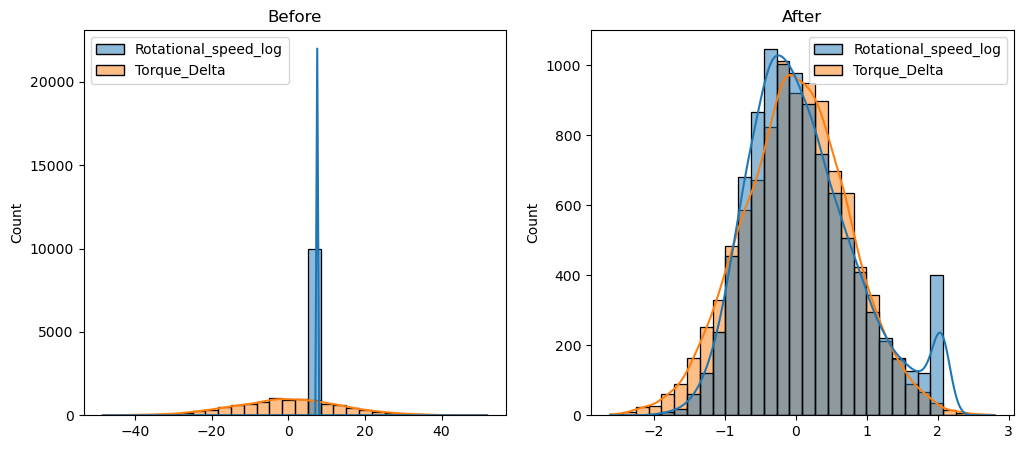

In [332]:
fig, axs = plt.subplots(ncols=2, figsize=(12, 5))

sns.histplot(df[['Rotational_speed_log', 'Torque_Delta']], bins=30, kde=True, ax=axs[0])
axs[0].set_title('Before')

sns.histplot(data_scaled[['Rotational_speed_log', 'Torque_Delta']], bins=30, kde=True, ax=axs[1])
axs[1].set_title('After')

plt.show()

In [333]:
df

,Type,Air temperature,Process temperature,Torque,Tool wear,Machine failure,temp_diff,temp_ratio,Rotational_speed_log,Torque_Delta
0,1.0,298.1,308.6,42.8,0,0,10.5,1.035223,7.347300,-0.00026
1,0.0,298.2,308.7,46.3,3,0,10.5,1.035211,7.250636,3.50000
2,0.0,298.1,308.5,49.4,5,0,10.4,1.034888,7.312553,3.10000
3,0.0,298.2,308.6,39.5,7,0,10.4,1.034876,7.268223,-9.90000
4,0.0,298.2,308.7,40.0,9,0,10.5,1.035211,7.250636,0.50000
...,...,...,...,...,...,...,...,...,...,...
9995,1.0,298.8,308.4,29.5,14,0,9.6,1.032129,7.380879,1.60000
9996,2.0,298.9,308.4,31.8,17,0,9.5,1.031783,7.398174,2.30000
9997,1.0,299.0,308.6,33.4,22,0,9.6,1.032107,7.406103,1.60000
9998,2.0,299.0,308.7,48.5,25,0,9.7,1.032441,7.250636,15.10000


In [334]:
print("عينة من البيانات الحالية:")
display(df.sample(5))

عينة من البيانات الحالية:


,Type,Air temperature,Process temperature,Torque,Tool wear,Machine failure,temp_diff,temp_ratio,Rotational_speed_log,Torque_Delta
9722,2.0,298.8,309.8,21.6,126,0,11.0,1.036814,7.555905,-19.0
9663,0.0,299.1,310.1,48.8,229,1,11.0,1.036777,7.269617,17.9
9413,0.0,298.1,308.6,44.9,205,0,10.5,1.035223,7.272398,18.2
978,1.0,296.2,306.8,42.3,129,0,10.6,1.035787,7.331060,21.3
1283,0.0,298.3,309.4,45.4,96,0,11.1,1.037211,7.213032,9.3


In [335]:
df.describe().T[['mean', 'std', 'min', '50%', 'max']]

,mean,std,min,50%,max
Type,0.500300,0.671301,0.000000,0.000000,2.000000
Air temperature,300.004930,2.000259,295.300000,300.100000,304.500000
Process temperature,310.005560,1.483734,305.700000,310.100000,313.800000
Torque,39.983490,9.914623,12.800000,40.100000,67.200000
Tool wear,107.951000,63.654147,0.000000,108.000000,253.000000
Machine failure,0.033900,0.180981,0.000000,0.000000,1.000000
temp_diff,10.000630,1.001094,7.600000,9.800000,12.100000
temp_ratio,1.033352,0.003492,1.025116,1.032847,1.040672
Rotational_speed_log,7.330131,0.096883,7.074286,7.315884,7.572790
Torque_Delta,-0.000260,13.981613,-48.400000,0.000000,51.900000


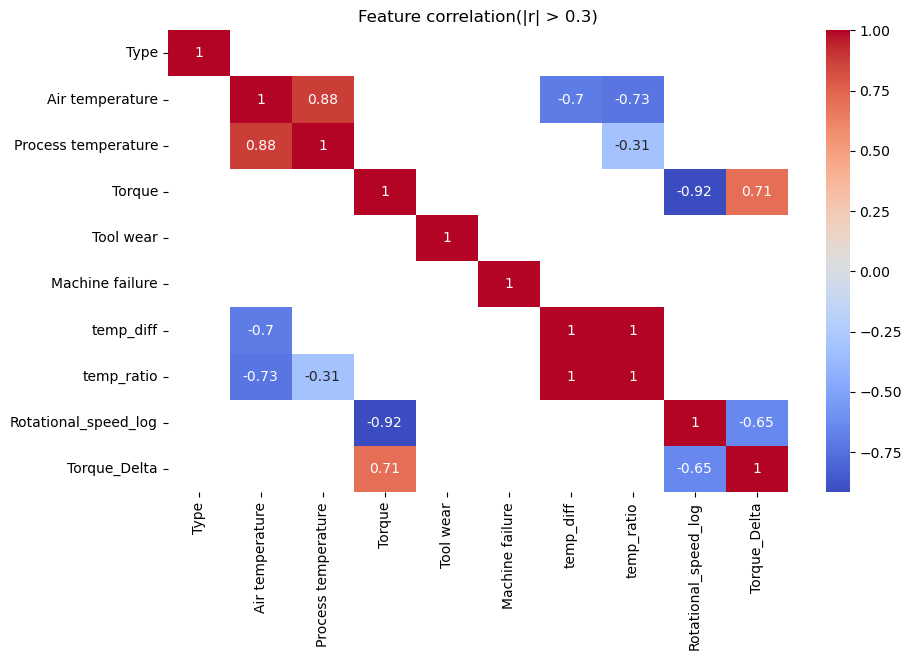

In [336]:
plt.figure(figsize=(10, 6))
corr = df.corr()
sns.heatmap(corr[abs(corr) > 0.3], annot=True, cmap='coolwarm')
plt.title("Feature correlation(|r| > 0.3)")
plt.show()

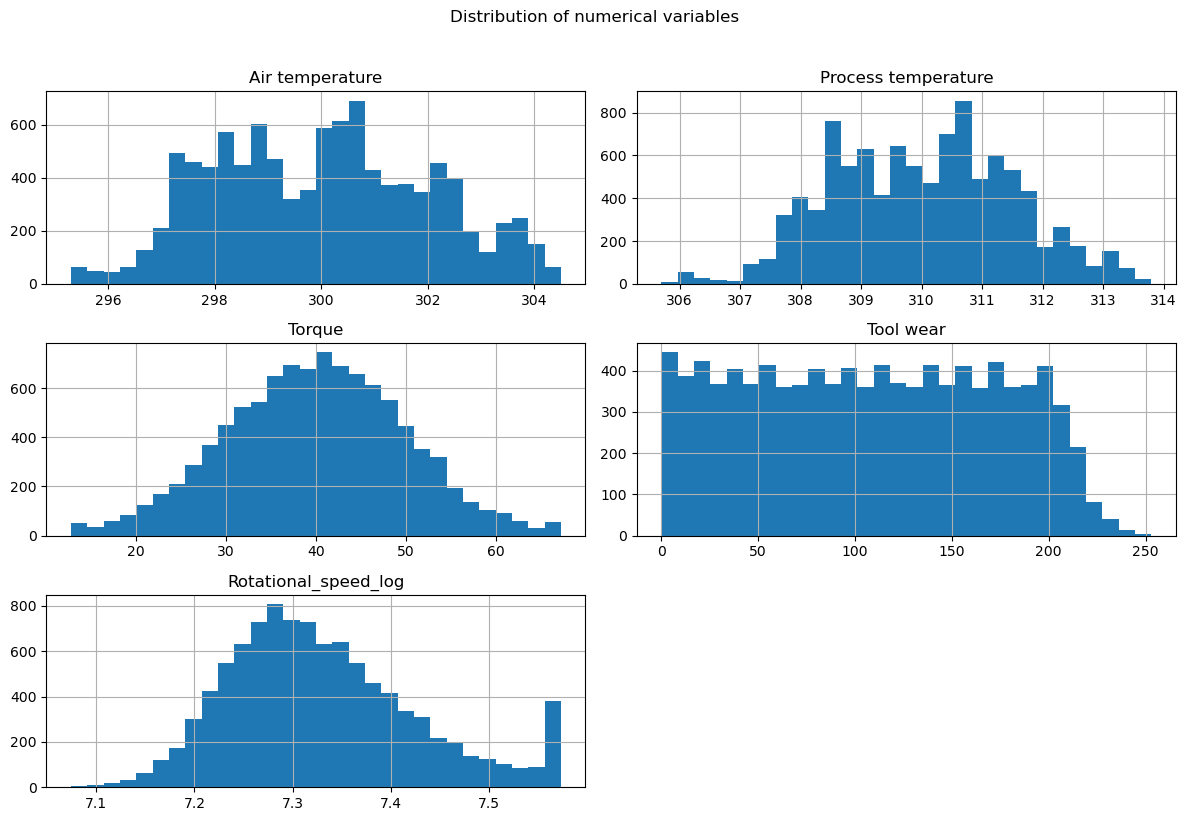

In [337]:
num_cols = ['Air temperature', 'Process temperature', 'Torque', 'Tool wear', 'Rotational_speed_log']
df[num_cols].hist(bins=30, figsize=(12, 8))
plt.suptitle('Distribution of numerical variables', y=1.02)
plt.tight_layout()
plt.show()

In [338]:
df

,Type,Air temperature,Process temperature,Torque,Tool wear,Machine failure,temp_diff,temp_ratio,Rotational_speed_log,Torque_Delta
0,1.0,298.1,308.6,42.8,0,0,10.5,1.035223,7.347300,-0.00026
1,0.0,298.2,308.7,46.3,3,0,10.5,1.035211,7.250636,3.50000
2,0.0,298.1,308.5,49.4,5,0,10.4,1.034888,7.312553,3.10000
3,0.0,298.2,308.6,39.5,7,0,10.4,1.034876,7.268223,-9.90000
4,0.0,298.2,308.7,40.0,9,0,10.5,1.035211,7.250636,0.50000
...,...,...,...,...,...,...,...,...,...,...
9995,1.0,298.8,308.4,29.5,14,0,9.6,1.032129,7.380879,1.60000
9996,2.0,298.9,308.4,31.8,17,0,9.5,1.031783,7.398174,2.30000
9997,1.0,299.0,308.6,33.4,22,0,9.6,1.032107,7.406103,1.60000
9998,2.0,299.0,308.7,48.5,25,0,9.7,1.032441,7.250636,15.10000


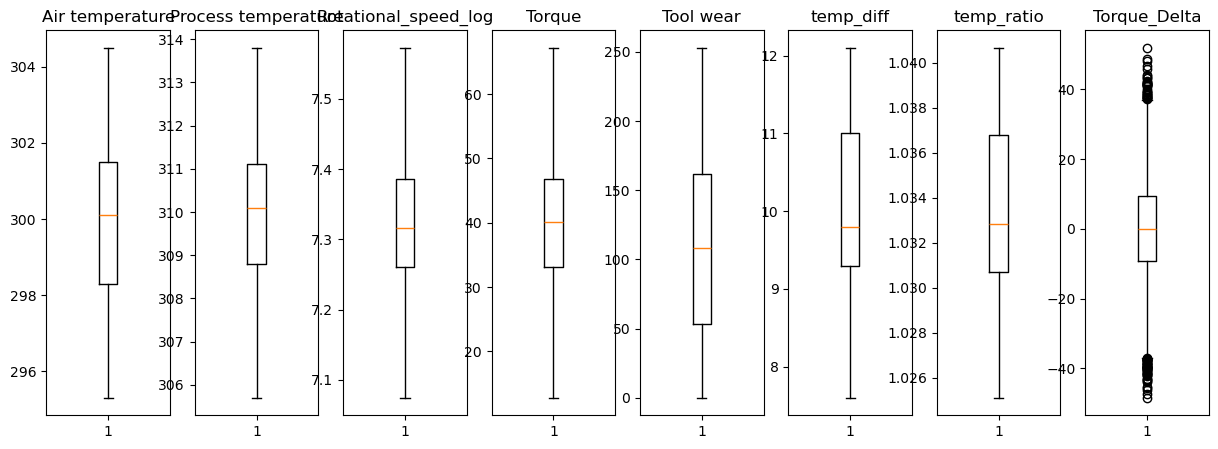

In [339]:
fig, axs = plt.subplots(ncols=8, figsize=(15, 5))

# list of column names for the boxplots
columns = ['Air temperature', 'Process temperature', 'Rotational_speed_log', 'Torque', 'Tool wear','temp_diff',	'temp_ratio','Torque_Delta']

# loop through the columns and plot the corresponding boxplot
for i, col in enumerate(columns):
    axs[i].boxplot(df[col])
    axs[i].set_title(col)

# display the plot
plt.show()

*Torque column cleaning*

In [341]:
Q1 = df['Torque_Delta'].quantile(0.25) 
Q3 = df['Torque_Delta'].quantile(0.75) 
IQR = Q3 - Q1 

outlier_threshold_low = Q1 - 1.5 * IQR
outlier_threshold_high = Q3 + 1.5 * IQR

df = df[(df['Torque_Delta'] >= outlier_threshold_low) & (df['Torque_Delta'] <= outlier_threshold_high)]

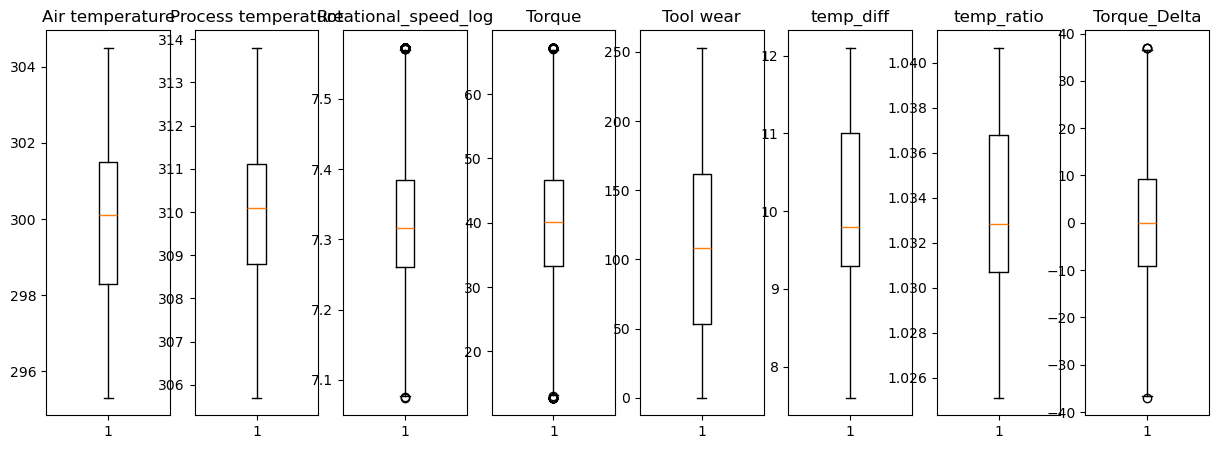

In [342]:
fig, axs = plt.subplots(ncols=8, figsize=(15, 5))

# list of column names for the boxplots
columns = ['Air temperature', 'Process temperature', 'Rotational_speed_log', 'Torque', 'Tool wear','temp_diff',	'temp_ratio','Torque_Delta']

# loop through the columns and plot the corresponding boxplot
for i, col in enumerate(columns):
    axs[i].boxplot(df[col])
    axs[i].set_title(col)

# display the plot
plt.show()

In [343]:
print(df['Torque_Delta'].describe())

count    9916.000000
mean        0.053953
std        13.523860
min       -37.000000
25%        -9.100000
50%         0.000000
75%         9.300000
max        37.000000
Name: Torque_Delta, dtype: float64


In [344]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df[['Torque_Delta']] = scaler.fit_transform(df[['Torque_Delta']])

C:\Users\omara\AppData\Local\Temp\ipykernel_32044\4127682968.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Torque_Delta']] = scaler.fit_transform(df[['Torque_Delta']])


In [345]:
print(df['Torque_Delta'].describe())

count    9916.000000
mean        0.002932
std         0.734992
min        -2.010870
25%        -0.494565
50%         0.000000
75%         0.505435
max         2.010870
Name: Torque_Delta, dtype: float64


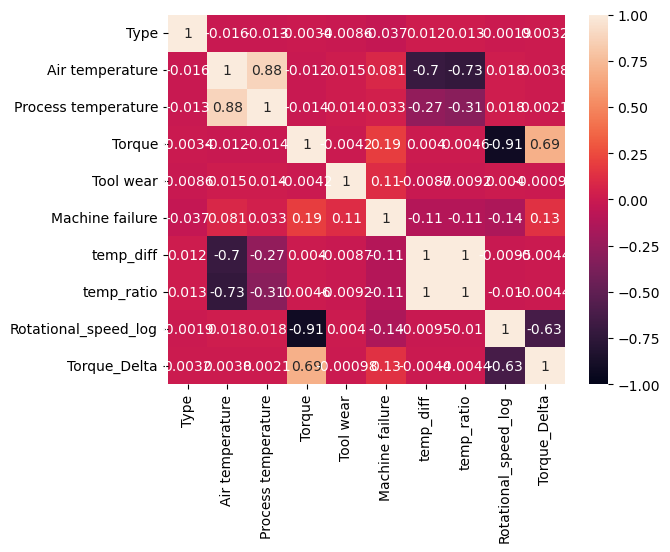

In [346]:
#creating the correlation matrix between all the features
df.corr()

#visualizing the heatmap
heatmap= sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True )

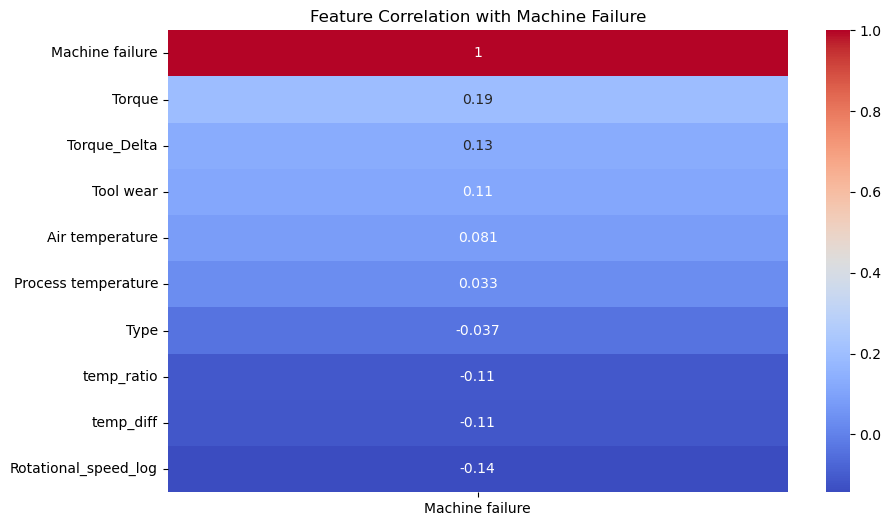

In [347]:
corr = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr[['Machine failure']].sort_values(by='Machine failure', ascending=False), annot=True, cmap='coolwarm')
plt.title("Feature Correlation with Machine Failure")
plt.show()

*Has high correlation with process tempreture so i decided to delete on of them*

In [349]:
df = df.drop(columns=['Air temperature'])

*check data after cleaning*

In [351]:
print(df.describe())

              Type  Process temperature       Torque    Tool wear  \
count  9916.000000          9916.000000  9916.000000  9916.000000   
mean      0.501311           310.002804    40.008814   108.003126   
std       0.671814             1.484306     9.756282    63.638104   
min       0.000000           305.700000    12.800000     0.000000   
25%       0.000000           308.800000    33.300000    53.000000   
50%       0.000000           310.100000    40.100000   108.000000   
75%       1.000000           311.100000    46.700000   162.000000   
max       2.000000           313.800000    67.200000   253.000000   

       Machine failure    temp_diff   temp_ratio  Rotational_speed_log  \
count      9916.000000  9916.000000  9916.000000           9916.000000   
mean          0.032372    10.002471     1.033359              7.329540   
std           0.176995     0.999532     0.003487              0.095582   
min           0.000000     7.600000     1.025116              7.074286   
25%     

In [352]:
df

,Type,Process temperature,Torque,Tool wear,Machine failure,temp_diff,temp_ratio,Rotational_speed_log,Torque_Delta
0,1.0,308.6,42.8,0,0,10.5,1.035223,7.347300,-0.000014
1,0.0,308.7,46.3,3,0,10.5,1.035211,7.250636,0.190217
2,0.0,308.5,49.4,5,0,10.4,1.034888,7.312553,0.168478
3,0.0,308.6,39.5,7,0,10.4,1.034876,7.268223,-0.538043
4,0.0,308.7,40.0,9,0,10.5,1.035211,7.250636,0.027174
...,...,...,...,...,...,...,...,...,...
9995,1.0,308.4,29.5,14,0,9.6,1.032129,7.380879,0.086957
9996,2.0,308.4,31.8,17,0,9.5,1.031783,7.398174,0.125000
9997,1.0,308.6,33.4,22,0,9.6,1.032107,7.406103,0.086957
9998,2.0,308.7,48.5,25,0,9.7,1.032441,7.250636,0.820652


In [353]:
df['Vibration_estimate'] = df['Torque'] * df['Rotational_speed_log']

In [354]:
df

,Type,Process temperature,Torque,Tool wear,Machine failure,temp_diff,temp_ratio,Rotational_speed_log,Torque_Delta,Vibration_estimate
0,1.0,308.6,42.8,0,0,10.5,1.035223,7.347300,-0.000014,314.464427
1,0.0,308.7,46.3,3,0,10.5,1.035211,7.250636,0.190217,335.704424
2,0.0,308.5,49.4,5,0,10.4,1.034888,7.312553,0.168478,361.240143
3,0.0,308.6,39.5,7,0,10.4,1.034876,7.268223,-0.538043,287.094809
4,0.0,308.7,40.0,9,0,10.5,1.035211,7.250636,0.027174,290.025420
...,...,...,...,...,...,...,...,...,...,...
9995,1.0,308.4,29.5,14,0,9.6,1.032129,7.380879,0.086957,217.735932
9996,2.0,308.4,31.8,17,0,9.5,1.031783,7.398174,0.125000,235.261936
9997,1.0,308.6,33.4,22,0,9.6,1.032107,7.406103,0.086957,247.363853
9998,2.0,308.7,48.5,25,0,9.7,1.032441,7.250636,0.820652,351.655822


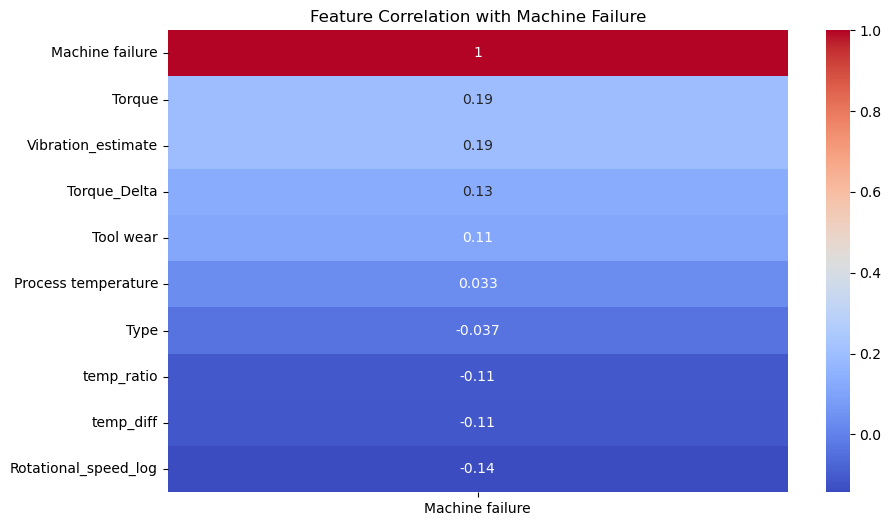

In [355]:
corr = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr[['Machine failure']].sort_values(by='Machine failure', ascending=False), annot=True, cmap='coolwarm')
plt.title("Feature Correlation with Machine Failure")
plt.show()

*Add new feature ---> vibration estimate*

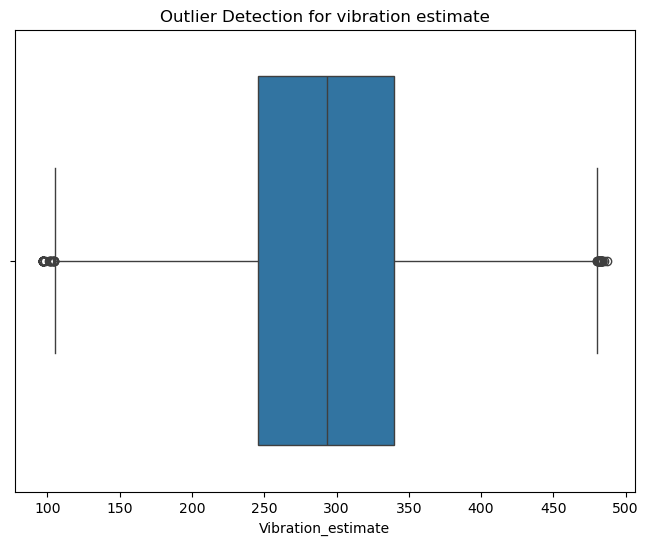

In [357]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Vibration_estimate'])
plt.title("Outlier Detection for vibration estimate")
plt.show()

In [358]:
Q1 = df['Vibration_estimate'].quantile(0.25)
Q3 = df['Vibration_estimate'].quantile(0.75)
IQR = Q3 - Q1

outlier_threshold_low = Q1 - 1.5 * IQR
outlier_threshold_high = Q3 + 1.5 * IQR

df_filtered = df[(df['Vibration_estimate'] >= outlier_threshold_low) & (df['Vibration_estimate'] <= outlier_threshold_high)]

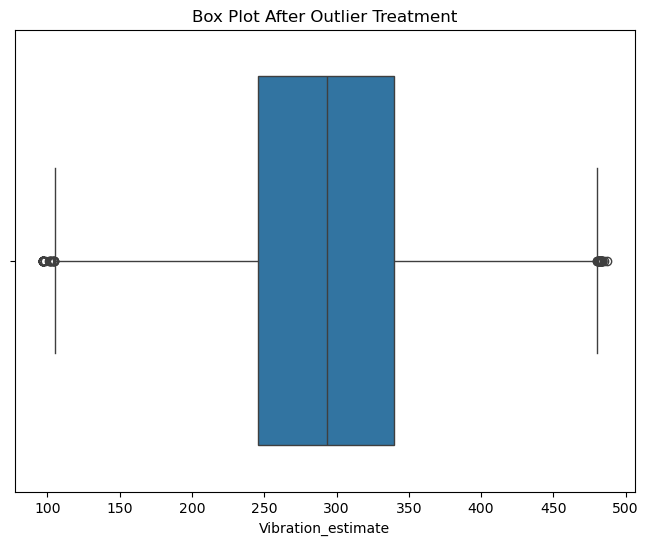

In [359]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Vibration_estimate'])
plt.title("Box Plot After Outlier Treatment")
plt.show()

*I used winsorize as IQR didnt delete the outlier effectively*

In [361]:
from scipy.stats.mstats import winsorize

df['Vibration_estimate'] = winsorize(df['Vibration_estimate'], limits=[0.05, 0.05]) 

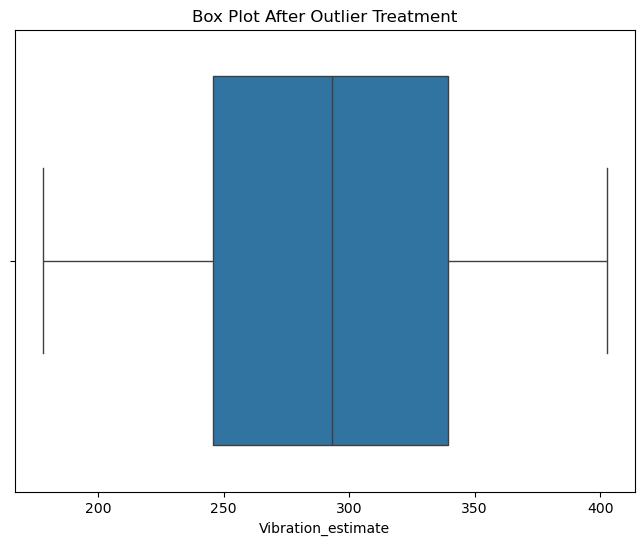

In [362]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Vibration_estimate'])
plt.title("Box Plot After Outlier Treatment")
plt.show()

In [363]:
df

,Type,Process temperature,Torque,Tool wear,Machine failure,temp_diff,temp_ratio,Rotational_speed_log,Torque_Delta,Vibration_estimate
0,1.0,308.6,42.8,0,0,10.5,1.035223,7.347300,-0.000014,314.464427
1,0.0,308.7,46.3,3,0,10.5,1.035211,7.250636,0.190217,335.704424
2,0.0,308.5,49.4,5,0,10.4,1.034888,7.312553,0.168478,361.240143
3,0.0,308.6,39.5,7,0,10.4,1.034876,7.268223,-0.538043,287.094809
4,0.0,308.7,40.0,9,0,10.5,1.035211,7.250636,0.027174,290.025420
...,...,...,...,...,...,...,...,...,...,...
9995,1.0,308.4,29.5,14,0,9.6,1.032129,7.380879,0.086957,217.735932
9996,2.0,308.4,31.8,17,0,9.5,1.031783,7.398174,0.125000,235.261936
9997,1.0,308.6,33.4,22,0,9.6,1.032107,7.406103,0.086957,247.363853
9998,2.0,308.7,48.5,25,0,9.7,1.032441,7.250636,0.820652,351.655822


In [364]:
df = df.drop(columns=['temp_ratio'])

In [365]:
df

,Type,Process temperature,Torque,Tool wear,Machine failure,temp_diff,Rotational_speed_log,Torque_Delta,Vibration_estimate
0,1.0,308.6,42.8,0,0,10.5,7.347300,-0.000014,314.464427
1,0.0,308.7,46.3,3,0,10.5,7.250636,0.190217,335.704424
2,0.0,308.5,49.4,5,0,10.4,7.312553,0.168478,361.240143
3,0.0,308.6,39.5,7,0,10.4,7.268223,-0.538043,287.094809
4,0.0,308.7,40.0,9,0,10.5,7.250636,0.027174,290.025420
...,...,...,...,...,...,...,...,...,...
9995,1.0,308.4,29.5,14,0,9.6,7.380879,0.086957,217.735932
9996,2.0,308.4,31.8,17,0,9.5,7.398174,0.125000,235.261936
9997,1.0,308.6,33.4,22,0,9.6,7.406103,0.086957,247.363853
9998,2.0,308.7,48.5,25,0,9.7,7.250636,0.820652,351.655822


In [366]:
df

,Type,Process temperature,Torque,Tool wear,Machine failure,temp_diff,Rotational_speed_log,Torque_Delta,Vibration_estimate
0,1.0,308.6,42.8,0,0,10.5,7.347300,-0.000014,314.464427
1,0.0,308.7,46.3,3,0,10.5,7.250636,0.190217,335.704424
2,0.0,308.5,49.4,5,0,10.4,7.312553,0.168478,361.240143
3,0.0,308.6,39.5,7,0,10.4,7.268223,-0.538043,287.094809
4,0.0,308.7,40.0,9,0,10.5,7.250636,0.027174,290.025420
...,...,...,...,...,...,...,...,...,...
9995,1.0,308.4,29.5,14,0,9.6,7.380879,0.086957,217.735932
9996,2.0,308.4,31.8,17,0,9.5,7.398174,0.125000,235.261936
9997,1.0,308.6,33.4,22,0,9.6,7.406103,0.086957,247.363853
9998,2.0,308.7,48.5,25,0,9.7,7.250636,0.820652,351.655822


In [367]:
df.describe()

,Type,Process temperature,Torque,Tool wear,Machine failure,temp_diff,Rotational_speed_log,Torque_Delta,Vibration_estimate
count,9916.000000,9916.000000,9916.000000,9916.000000,9916.000000,9916.000000,9916.000000,9916.000000,9916.000000
mean,0.501311,310.002804,40.008814,108.003126,0.032372,10.002471,7.329540,0.002932,292.309671
std,0.671814,1.484306,9.756282,63.638104,0.176995,0.999532,0.095582,0.734992,62.468117
min,0.000000,305.700000,12.800000,0.000000,0.000000,7.600000,7.074286,-2.010870,178.074909
25%,0.000000,308.800000,33.300000,53.000000,0.000000,9.300000,7.261225,-0.494565,245.637701
50%,0.000000,310.100000,40.100000,108.000000,0.000000,9.800000,7.315884,0.000000,293.269996
75%,1.000000,311.100000,46.700000,162.000000,0.000000,11.000000,7.384766,0.505435,339.451887
max,2.000000,313.800000,67.200000,253.000000,1.000000,12.100000,7.572790,2.010870,402.580801


In [368]:
features = ['Process temperature', 'Torque', 'Tool wear', 
            'Rotational_speed_log', 'Torque_Delta', 'Vibration_estimate']
X = df[features].dropna() 

In [369]:
df.describe()

,Type,Process temperature,Torque,Tool wear,Machine failure,temp_diff,Rotational_speed_log,Torque_Delta,Vibration_estimate
count,9916.000000,9916.000000,9916.000000,9916.000000,9916.000000,9916.000000,9916.000000,9916.000000,9916.000000
mean,0.501311,310.002804,40.008814,108.003126,0.032372,10.002471,7.329540,0.002932,292.309671
std,0.671814,1.484306,9.756282,63.638104,0.176995,0.999532,0.095582,0.734992,62.468117
min,0.000000,305.700000,12.800000,0.000000,0.000000,7.600000,7.074286,-2.010870,178.074909
25%,0.000000,308.800000,33.300000,53.000000,0.000000,9.300000,7.261225,-0.494565,245.637701
50%,0.000000,310.100000,40.100000,108.000000,0.000000,9.800000,7.315884,0.000000,293.269996
75%,1.000000,311.100000,46.700000,162.000000,0.000000,11.000000,7.384766,0.505435,339.451887
max,2.000000,313.800000,67.200000,253.000000,1.000000,12.100000,7.572790,2.010870,402.580801


In [370]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

*Apply PCA*

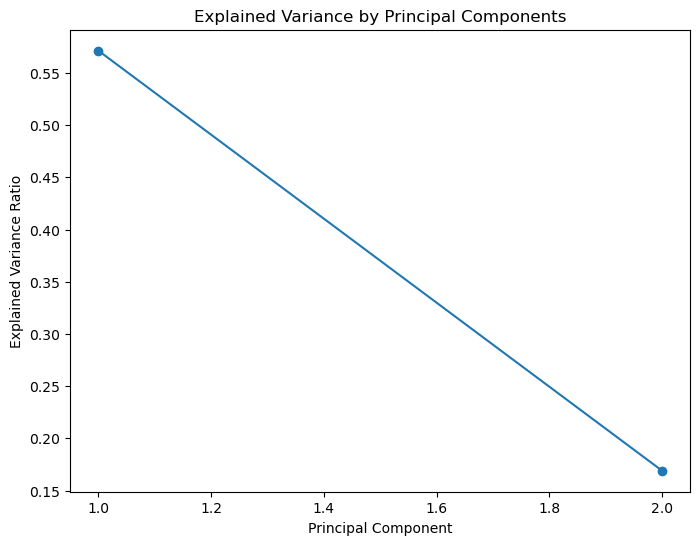

In [372]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) 
X_pca = pca.fit_transform(X_scaled)

explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.show()

In [373]:
from scipy.stats.mstats import winsorize

df['Torque'] = winsorize(df['Torque'], limits=[0.05, 0.05])

In [374]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.05, random_state=42)
df['anomaly_iso'] = iso_forest.fit_predict(X_scaled)
anomalies_iso = df[df['anomaly_iso'] == -1] 

In [375]:
print(df['anomaly_iso'].value_counts())

anomaly_iso
 1    9420
-1     496
Name: count, dtype: int64


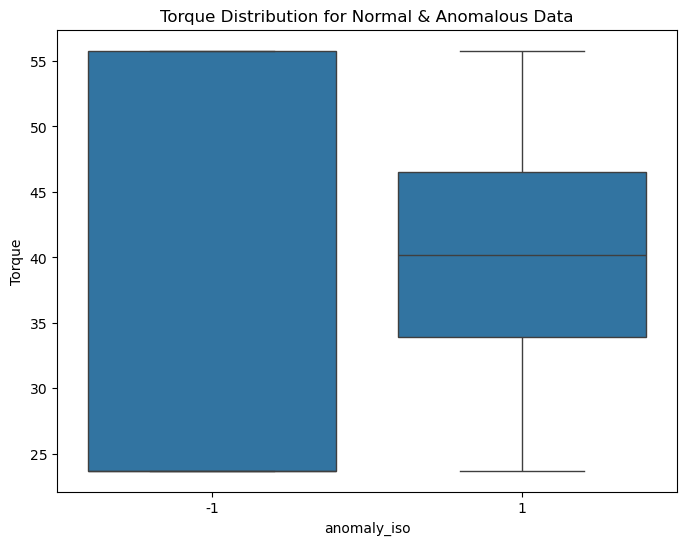

In [376]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['anomaly_iso'], y=df['Torque'])
plt.title("Torque Distribution for Normal & Anomalous Data")
plt.show()

In [377]:
df.isnull().sum()

Type                    0
Process temperature     0
Torque                  0
Tool wear               0
Machine failure         0
temp_diff               0
Rotational_speed_log    0
Torque_Delta            0
Vibration_estimate      0
anomaly_iso             0
dtype: int64

In [378]:
df

,Type,Process temperature,Torque,Tool wear,Machine failure,temp_diff,Rotational_speed_log,Torque_Delta,Vibration_estimate,anomaly_iso
0,1.0,308.6,42.8,0,0,10.5,7.347300,-0.000014,314.464427,1
1,0.0,308.7,46.3,3,0,10.5,7.250636,0.190217,335.704424,1
2,0.0,308.5,49.4,5,0,10.4,7.312553,0.168478,361.240143,1
3,0.0,308.6,39.5,7,0,10.4,7.268223,-0.538043,287.094809,1
4,0.0,308.7,40.0,9,0,10.5,7.250636,0.027174,290.025420,1
...,...,...,...,...,...,...,...,...,...,...
9995,1.0,308.4,29.5,14,0,9.6,7.380879,0.086957,217.735932,1
9996,2.0,308.4,31.8,17,0,9.5,7.398174,0.125000,235.261936,1
9997,1.0,308.6,33.4,22,0,9.6,7.406103,0.086957,247.363853,1
9998,2.0,308.7,48.5,25,0,9.7,7.250636,0.820652,351.655822,1


*check cleaning*

In [380]:
print(df.isnull().sum())

Type                    0
Process temperature     0
Torque                  0
Tool wear               0
Machine failure         0
temp_diff               0
Rotational_speed_log    0
Torque_Delta            0
Vibration_estimate      0
anomaly_iso             0
dtype: int64


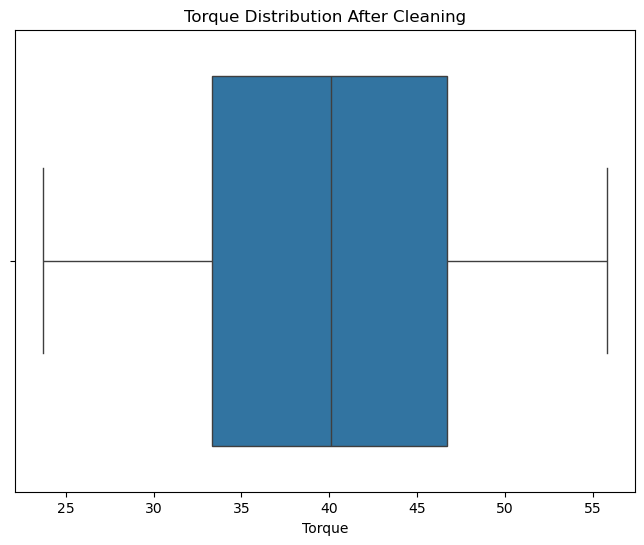

In [381]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Torque'])
plt.title("Torque Distribution After Cleaning")
plt.show()

In [382]:
df

,Type,Process temperature,Torque,Tool wear,Machine failure,temp_diff,Rotational_speed_log,Torque_Delta,Vibration_estimate,anomaly_iso
0,1.0,308.6,42.8,0,0,10.5,7.347300,-0.000014,314.464427,1
1,0.0,308.7,46.3,3,0,10.5,7.250636,0.190217,335.704424,1
2,0.0,308.5,49.4,5,0,10.4,7.312553,0.168478,361.240143,1
3,0.0,308.6,39.5,7,0,10.4,7.268223,-0.538043,287.094809,1
4,0.0,308.7,40.0,9,0,10.5,7.250636,0.027174,290.025420,1
...,...,...,...,...,...,...,...,...,...,...
9995,1.0,308.4,29.5,14,0,9.6,7.380879,0.086957,217.735932,1
9996,2.0,308.4,31.8,17,0,9.5,7.398174,0.125000,235.261936,1
9997,1.0,308.6,33.4,22,0,9.6,7.406103,0.086957,247.363853,1
9998,2.0,308.7,48.5,25,0,9.7,7.250636,0.820652,351.655822,1


In [383]:
from statsmodels.tsa.seasonal import seasonal_decompose

features = ['Process temperature', 'Torque', 'Rotational_speed_log', 'Torque_Delta', 'Vibration_estimate']

for feature in features:
    decomposition = seasonal_decompose(df[feature].dropna(), model='additive', period=60)
    
    fig = decomposition.plot()
    plt.suptitle(f'Time-Series Decomposition for {feature}', y=1.05)
    
    plt.savefig(f'time_series_decomposition_{feature}.png')
    plt.close()

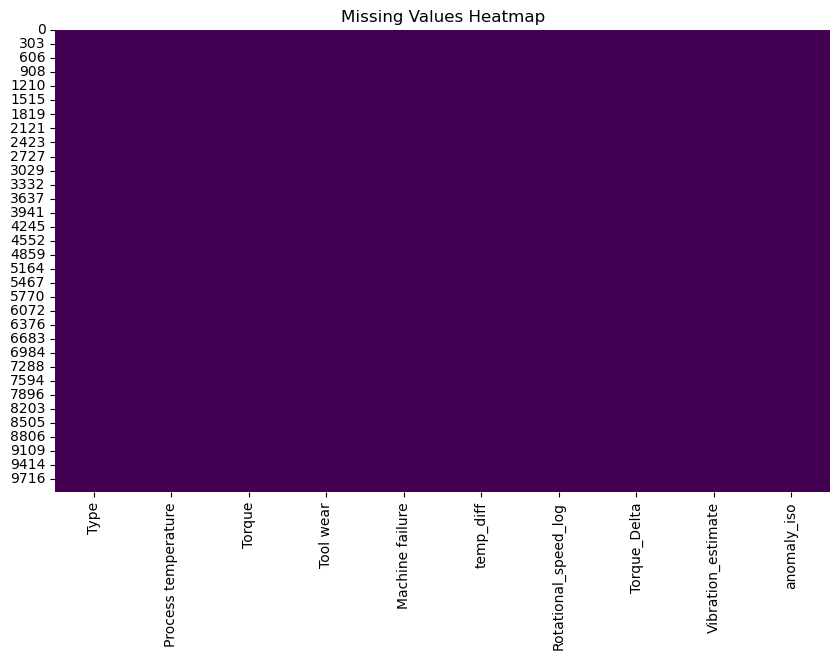

In [384]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

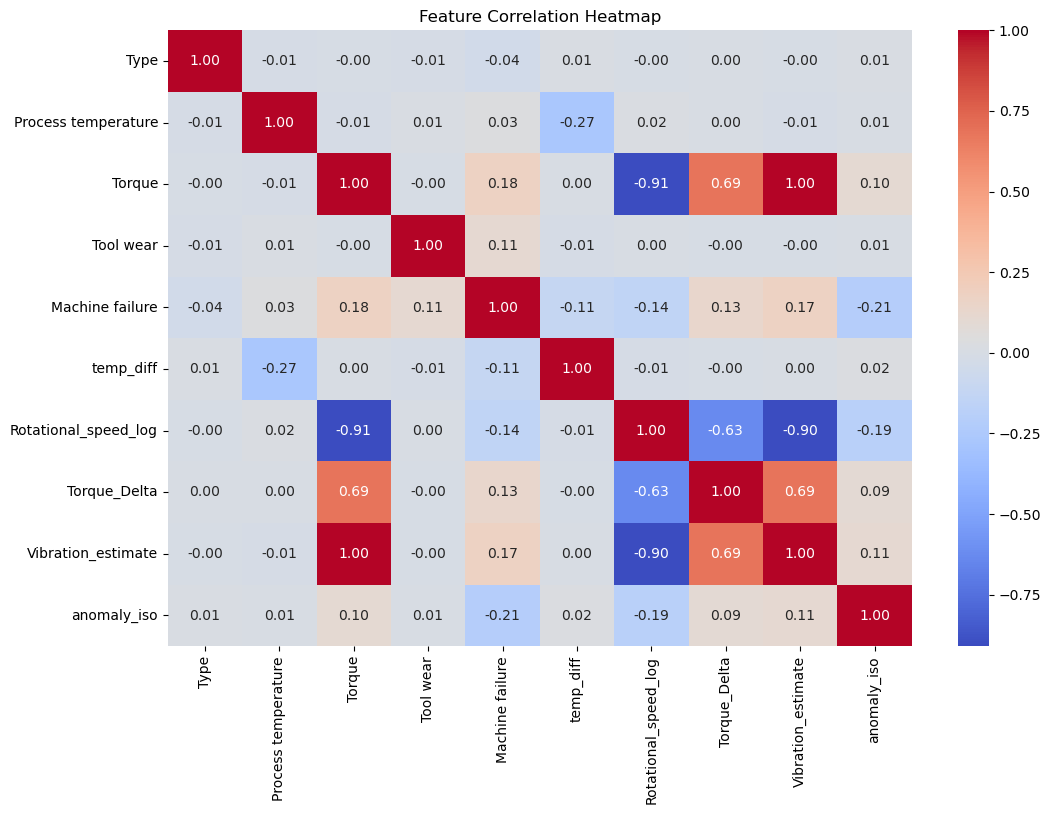

In [385]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

**NOTE : HWO WILL DESIGN THE MODEL SHOULD BALANCE THE FAILURE AND NON FAILURE BEFORE SPLITING DATA  -----> CAN USE SMOTE OR WHAT WE STUDIED

Epoch 1/20
423/423 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8933 - loss: 0.2771 - val_accuracy: 0.9255 - val_loss: 0.3433
Epoch 2/20
423/423 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9241 - loss: 0.2053 - val_accuracy: 0.9476 - val_loss: 0.1442
Epoch 3/20
423/423 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9428 - loss: 0.1481 - val_accuracy: 0.9517 - val_loss: 0.1300
Epoch 4/20
423/423 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9475 - loss: 0.1353 - val_accuracy: 0.9617 - val_loss: 0.1038
Epoch 5/20
423/423 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9574 - loss: 0.1139 - val_accuracy: 0.9652 - val_loss: 0.0940
Epoch 6/20
423/423 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9571 - loss: 0.1129 - val_accuracy: 0.9652 - val_loss: 0.0910
Epoch 7/20
423/423 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9621 - loss: 0.1004 - val_accuracy: 0.9641 - val_loss: 0.0901
Epoch 8/20
423/423 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9573 - loss: 0.1050 - val_accuracy: 0.

C:\Users\omara\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:43:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
LSTM Metrics on Test Set:
Precision: 0.9724647414372062
Recall: 0.9790398918187965
F1-Score: 0.9757412398921833
ROC-AUC: 0.9750833261910883

XGBoost Metrics on Test Set:
Precision: 0.9891818796484111
Recall: 0.9891818796484111
F1-Score: 0.9891818796484111
ROC-AUC: 0.9889571370073041
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Ensemble Metrics on Test Set (Adjusted Weights):
Precision: 0.9878296146044625
Recall: 0.9878296146044625
F1-Score: 0.9878296146044625
ROC-AUC: 0.9875767791332172
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Stacking Metrics on Test Set:
Precision: 0.987846049966239
Recall: 0.9891818796484111
F1-Score: 0.9885135135135135
ROC-AUC: 0.9882529116551915


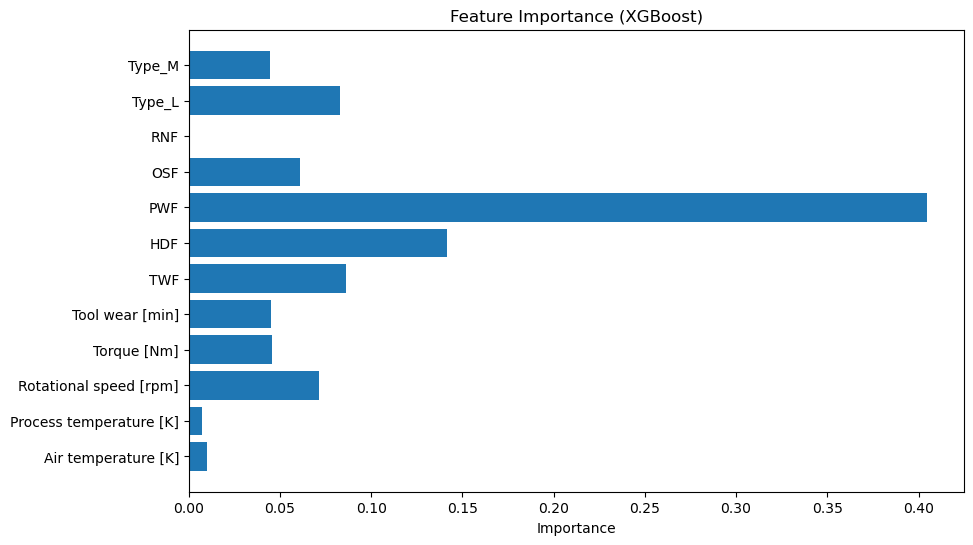

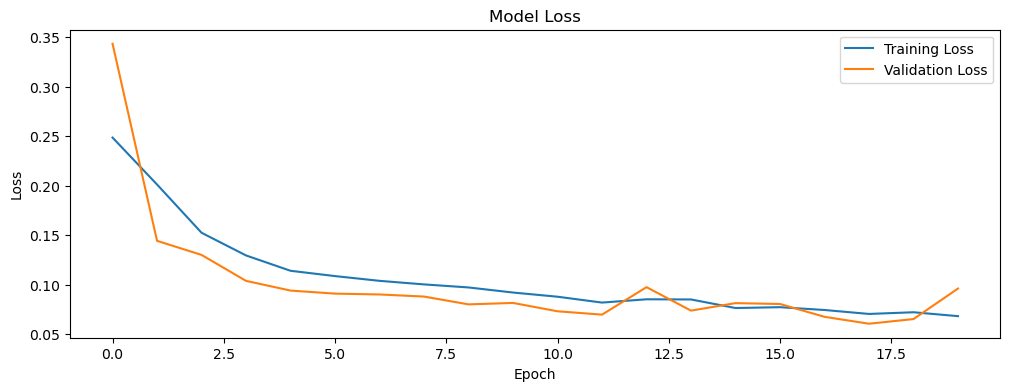

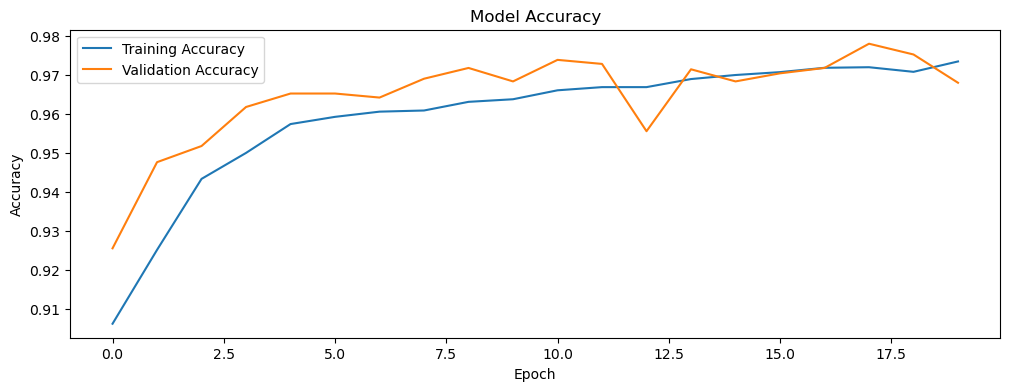

In [521]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

df = pd.read_csv("sensors_data.csv")
df.drop(columns=['UDI', 'Product ID'], inplace=True)

X = df.drop(columns=['Machine failure'])
y = df['Machine failure']
X = pd.get_dummies(X, columns=['Type'], drop_first=True)

smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

scaler = RobustScaler()
X_balanced_scaled = scaler.fit_transform(X_balanced)

X_train, X_test, y_train, y_test = train_test_split(X_balanced_scaled, y_balanced, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1765, random_state=42)

X_train_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val_lstm = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

model_lstm = Sequential([
    Input(shape=(X_train.shape[1], 1)),
    LSTM(100, return_sequences=True),
    Dropout(0.2),
    BatchNormalization(),
    LSTM(100),
    Dropout(0.2),
    BatchNormalization(),
    Dense(1, activation='sigmoid')
])
model_lstm.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model_lstm.fit(X_train_lstm, y_train, epochs=20, batch_size=32, validation_data=(X_val_lstm, y_val), callbacks=[early_stopping])

model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model_xgb.fit(X_train, y_train)

y_pred_lstm = (model_lstm.predict(X_test_lstm) > 0.5).astype(int)
print("LSTM Metrics on Test Set:")
print(f"Precision: {precision_score(y_test, y_pred_lstm)}")
print(f"Recall: {recall_score(y_test, y_pred_lstm)}")
print(f"F1-Score: {f1_score(y_test, y_pred_lstm)}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_lstm)}")

y_pred_xgb = model_xgb.predict(X_test)
print("\nXGBoost Metrics on Test Set:")
print(f"Precision: {precision_score(y_test, y_pred_xgb)}")
print(f"Recall: {recall_score(y_test, y_pred_xgb)}")
print(f"F1-Score: {f1_score(y_test, y_pred_xgb)}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_xgb)}")

y_pred_lstm_prob = model_lstm.predict(X_test_lstm).flatten()
y_pred_xgb_prob = model_xgb.predict_proba(X_test)[:, 1]
y_pred_ensemble = (0.3 * y_pred_lstm_prob + 0.7 * y_pred_xgb_prob > 0.5).astype(int)
print("\nEnsemble Metrics on Test Set (Adjusted Weights):")
print(f"Precision: {precision_score(y_test, y_pred_ensemble)}")
print(f"Recall: {recall_score(y_test, y_pred_ensemble)}")
print(f"F1-Score: {f1_score(y_test, y_pred_ensemble)}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_ensemble)}")

y_pred_lstm_prob_val = model_lstm.predict(X_val_lstm).flatten()
y_pred_xgb_prob_val = model_xgb.predict_proba(X_val)[:, 1]
meta_features_val = np.column_stack((y_pred_lstm_prob_val, y_pred_xgb_prob_val))
meta_model = LogisticRegression()
meta_model.fit(meta_features_val, y_val)
y_pred_lstm_prob_test = model_lstm.predict(X_test_lstm).flatten()
y_pred_xgb_prob_test = model_xgb.predict_proba(X_test)[:, 1]
meta_features_test = np.column_stack((y_pred_lstm_prob_test, y_pred_xgb_prob_test))
y_pred_stacking = meta_model.predict(meta_features_test)
print("\nStacking Metrics on Test Set:")
print(f"Precision: {precision_score(y_test, y_pred_stacking)}")
print(f"Recall: {recall_score(y_test, y_pred_stacking)}")
print(f"F1-Score: {f1_score(y_test, y_pred_stacking)}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_stacking)}")

feature_names = X.columns
importance = model_xgb.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importance)
plt.title('Feature Importance (XGBoost)')
plt.xlabel('Importance')
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

model_lstm.save('lstm_model.keras')